In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_excel(r"C:\Users\Tippu\Downloads\concrete+compressive+strength\Concrete_Data.xls")

In [3]:
df.sample()

Cement (component 1)(kg in a m^3 mixture)  \
410                                     172.38   

     Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
410                                              13.61       

     Fly Ash (component 3)(kg in a m^3 mixture)  \
410                                      172.37   

     Water  (component 4)(kg in a m^3 mixture)  \
410                                     156.76   

     Superplasticizer (component 5)(kg in a m^3 mixture)  \
410                                               4.14     

     Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
410                                             1006.3      

     Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
410                                              856.4          3   

     Concrete compressive strength(MPa, megapascals)   
410                                         21.291019

<Axes: >

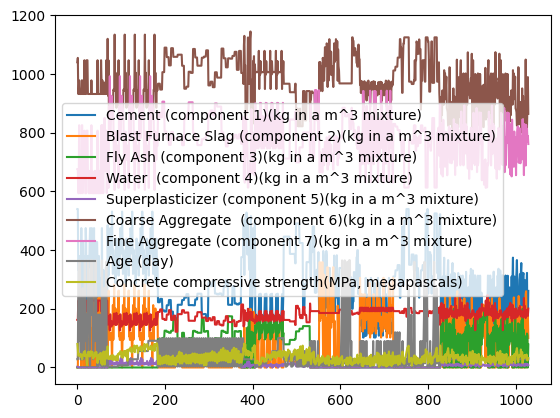

In [4]:
df.plot(kind='line')

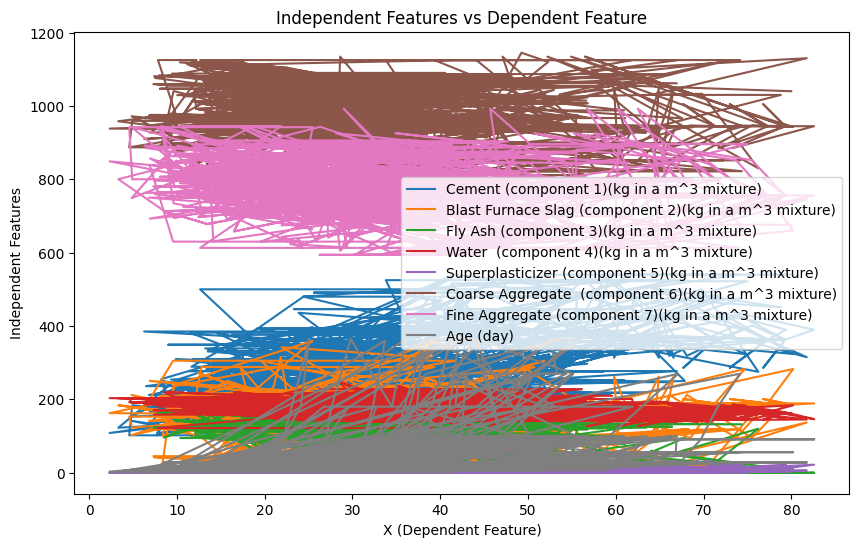

In [5]:
plt.figure(figsize=(10, 6))

for col in df.columns[:-1]:  # Skip the first column (X) since it's the dependent feature
    plt.plot( df[df.columns[-1]],df[col], label=col)

plt.xlabel('X (Dependent Feature)')
plt.ylabel('Independent Features')
plt.title('Independent Features vs Dependent Feature')
plt.legend()
plt.show()

In [6]:
df.head()

Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                      162.0   
1                                      162.0   
2                                      228.0   
3                                      228.0   
4                                      192.0   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                2.5     
1                                                2.5     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                             1040.0      
1                                             1055.0      
2                                              932.0      
3                                              932.0      
4                                              978.4      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
0                                              676.0         28   
1                                              676.0         28   
2                                              594.0        270   
3                                              594.0        365   
4                                              825.5        360   

   Concrete compressive strength(MPa, megapascals)   
0                                         79.986111  
1                                         61.887366  
2                                         40.269535  
3                                         41.052780  
4                                         44.296075

In [7]:
df.shape

(1030, 9)

In [8]:
df.duplicated().sum()

25

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(1005, 9)

In [11]:
df.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1005 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1005 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1005 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1005 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1005 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1005 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1005 non-null   float64
 7   Age (day)                                              1005 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)       

In [13]:
df.head()

Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                      162.0   
1                                      162.0   
2                                      228.0   
3                                      228.0   
4                                      192.0   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                2.5     
1                                                2.5     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                             1040.0      
1                                             1055.0      
2                                              932.0      
3                                              932.0      
4                                              978.4      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
0                                              676.0         28   
1                                              676.0         28   
2                                              594.0        270   
3                                              594.0        365   
4                                              825.5        360   

   Concrete compressive strength(MPa, megapascals)   
0                                         79.986111  
1                                         61.887366  
2                                         40.269535  
3                                         41.052780  
4                                         44.296075

In [14]:
df.columns[:-1]

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)'],
      dtype='object')

In [15]:
a=[]
for i in df.columns[:-1]:
    k=1
    a.append(i[:i.find('(')-1]+i[i.find(')')+1:])

In [17]:
a.append(df.columns[-1])

c:\Users\Tippu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


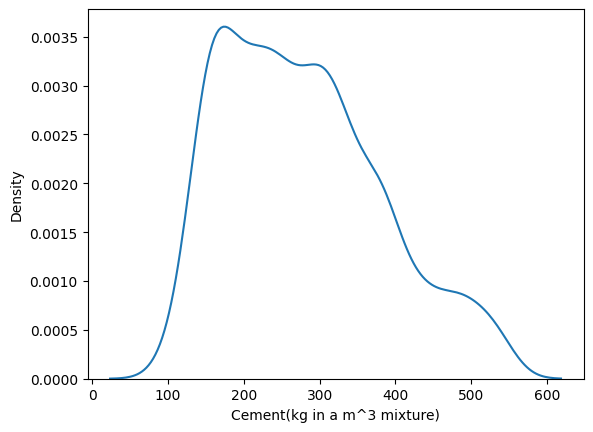

c:\Users\Tippu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


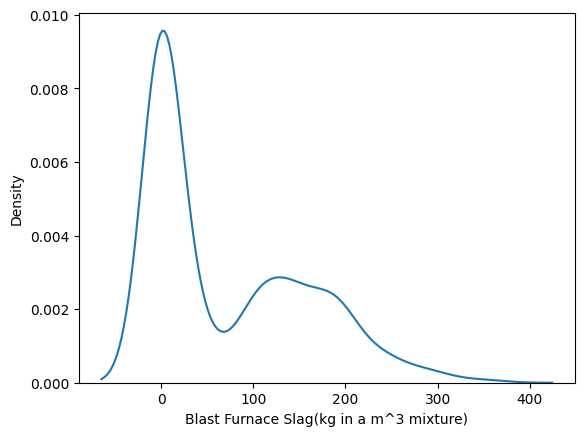

c:\Users\Tippu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


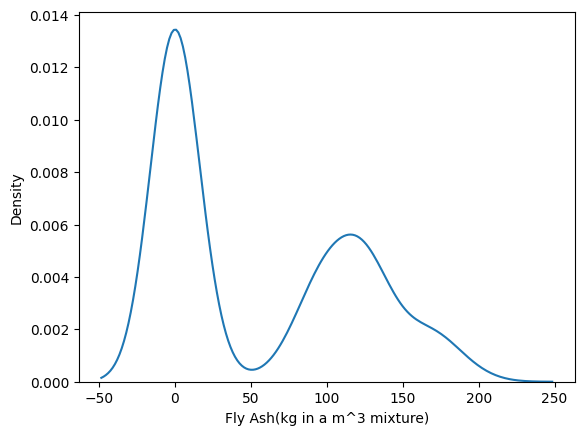

c:\Users\Tippu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


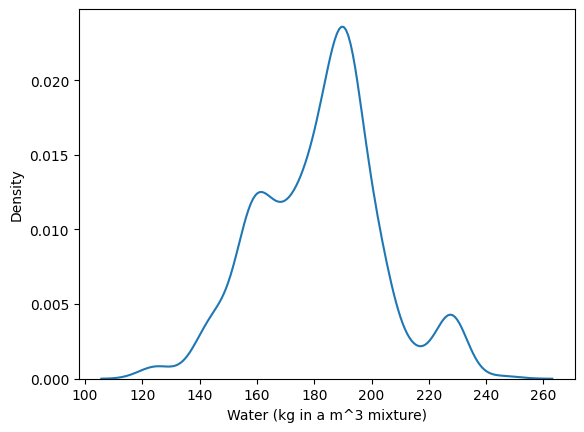

c:\Users\Tippu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


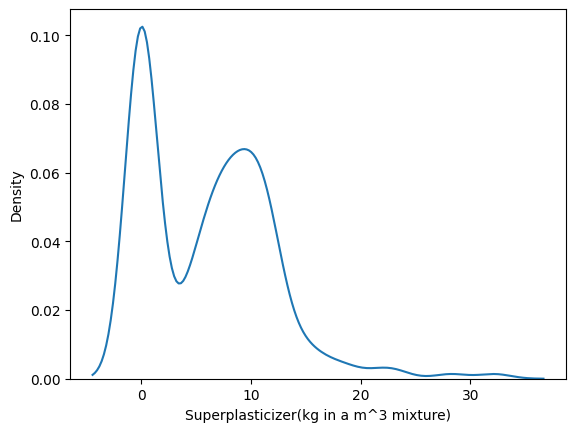

c:\Users\Tippu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


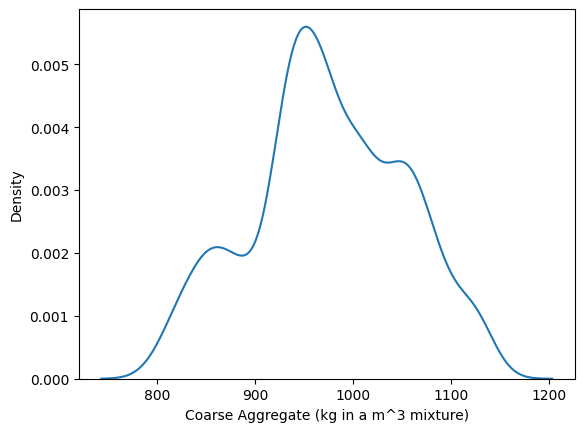

c:\Users\Tippu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


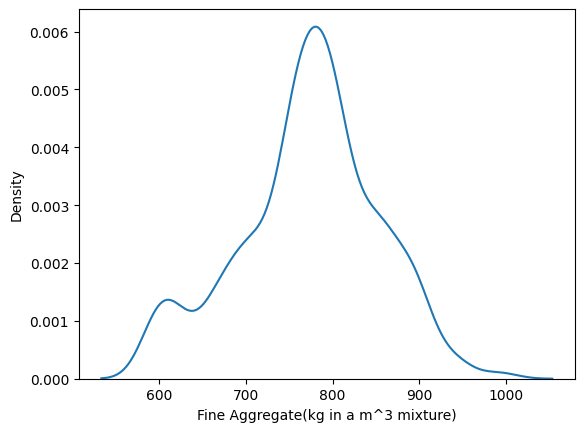

c:\Users\Tippu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


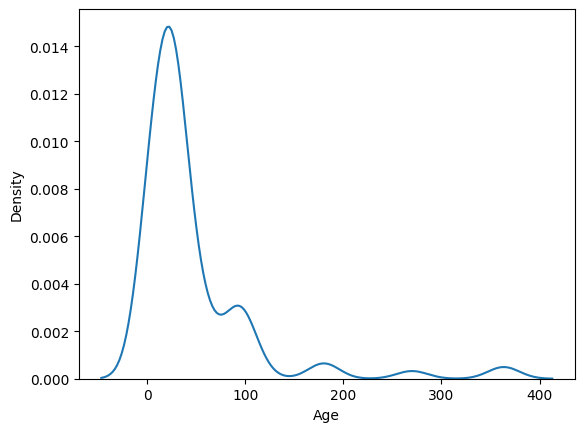

c:\Users\Tippu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


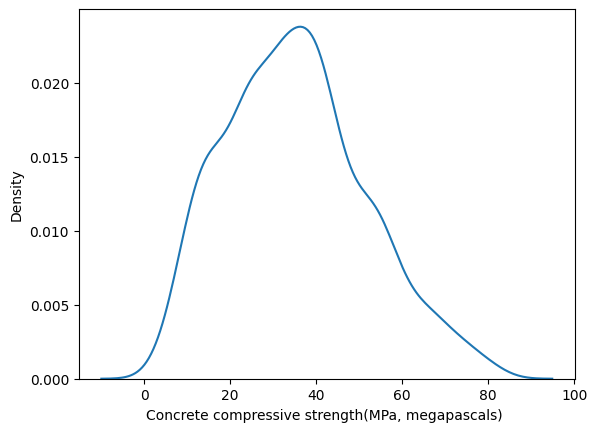

In [20]:
for i in df.columns:
    sns.kdeplot(df[i])
    plt.show()

# COrrerlation()

<Axes: >

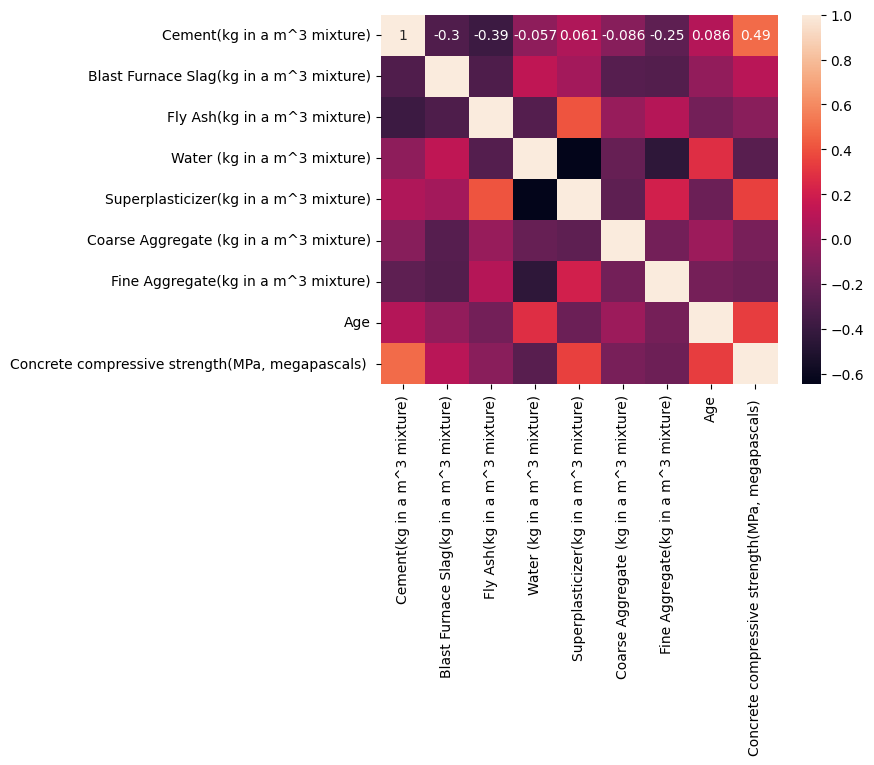

In [21]:
sns.heatmap(df.corr(),annot=True)

# VIF

In [22]:
def vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return vif_data

print(vif(df))

NameError: name 'variance_inflation_factor' is not defined

A VIF close to 1 indicates no multicollinearity. 
  

A VIF between 1 and 5 suggests moderate multicollinearity.   


A VIF greater than 5 indicates severe multicollinearity.   


Since Larger Deviations in VIF usually Greater than we need to do some transformations

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(df.columns[-1],axis=1),df[df.columns[-1]],test_size=0.25,random_state=45)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((753, 8), (252, 8), (753,), (252,))

# Transformations

In [ ]:
from sklearn.preprocessing import PowerTransformer
Pt=PowerTransformer()

In [ ]:
PT_XTR=Pt.fit_transform(X_train)
PT_XTE=Pt.transform(X_test)

In [ ]:
PT_XTR=pd.DataFrame(PT_XTR,columns=Pt.get_feature_names_out())
PT_XTE=pd.DataFrame(PT_XTE,columns=Pt.get_feature_names_out())

In [ ]:
PT_XTR.shape

(753, 8)

<Axes: >

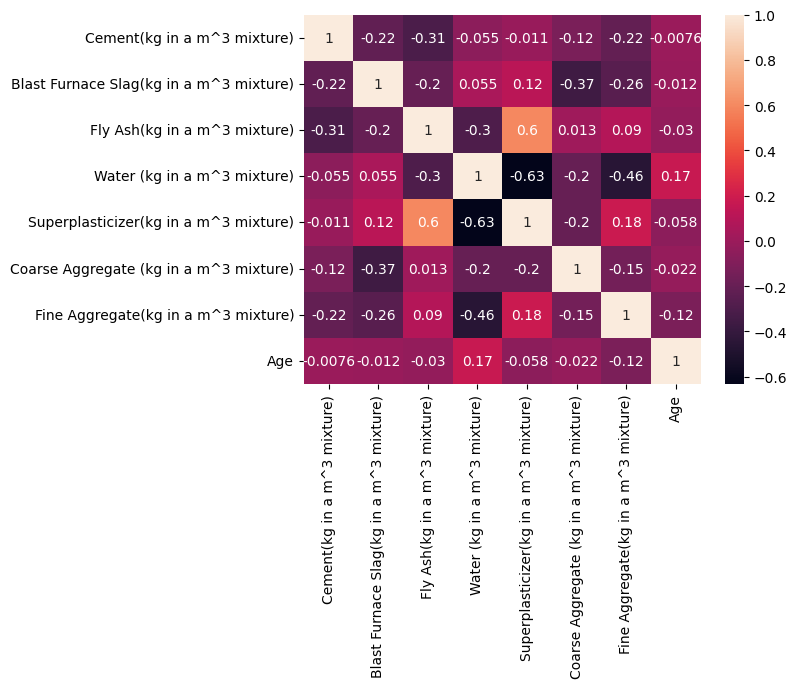

In [ ]:
sns.heatmap(PT_XTR.corr(),annot=True)

<Axes: >

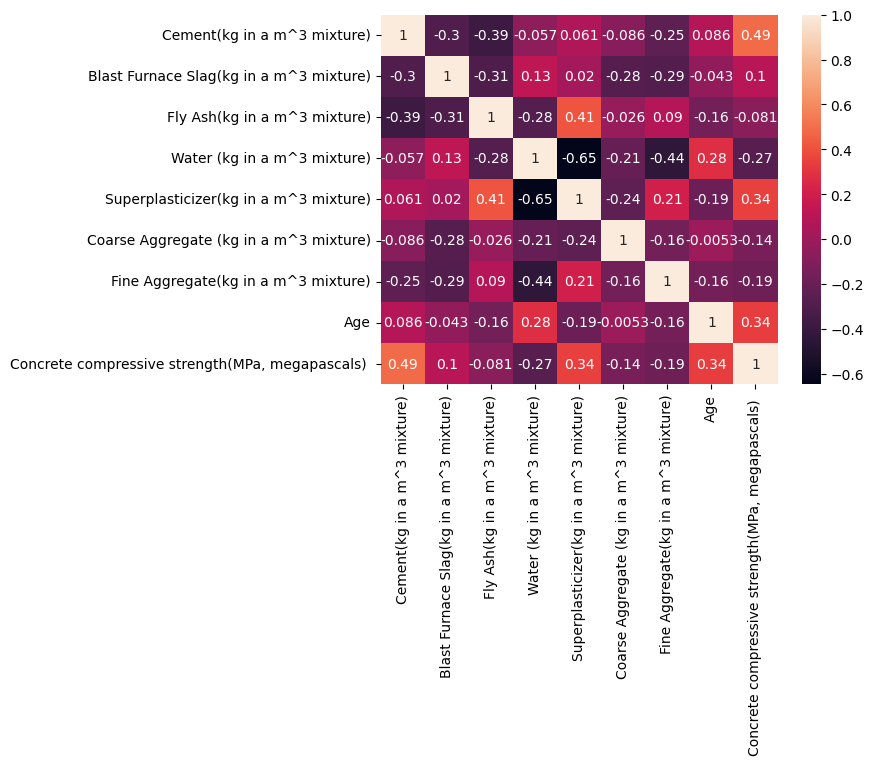

In [ ]:
sns.heatmap(df.corr(),annot=True)

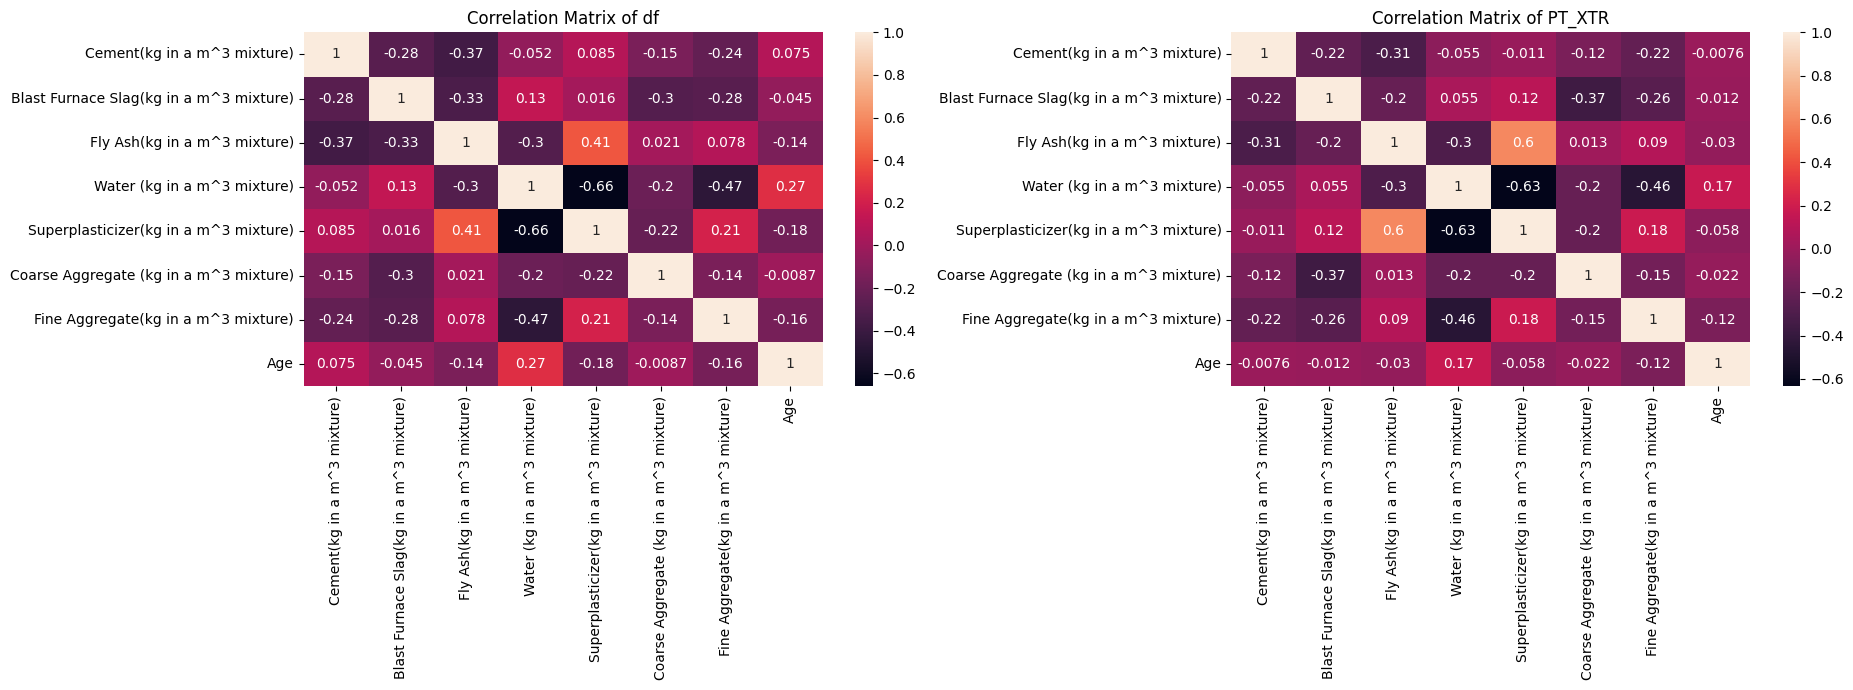

In [ ]:
# This line likely creates a pandas dataframe called 'df'
# ... (your code to create the dataframe 'df')

# Creates a figure with two subplots arranged horizontally
fig, axes = plt.subplots(1, 2,figsize=(19,7))

# Creates a heatmap on the first subplot
#  - 'df.corr()' calculates the correlation matrix of the dataframe 'df'
#  - 'annot=True' displays the correlation values within the heatmap cells
# First heatmap with title
sns.heatmap(X_train.corr(), annot=True, ax=axes[0])
axes[0].set_title('Correlation Matrix of df')

# Second heatmap with title
sns.heatmap(PT_XTR.corr(), annot=True, ax=axes[1])
axes[1].set_title('Correlation Matrix of PT_XTR')

plt.tight_layout()
plt.show()

In [ ]:
def vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return vif_data
print(vif(X_train))
print(vif(PT_XTR))

                                   feature        VIF
0              Cement(kg in a m^3 mixture)  15.045526
1  Blast Furnace Slag(kg in a m^3 mixture)   3.151492
2             Fly Ash(kg in a m^3 mixture)   4.140621
3              Water (kg in a m^3 mixture)  82.585284
4    Superplasticizer(kg in a m^3 mixture)   5.318368
5   Coarse Aggregate (kg in a m^3 mixture)  85.866889
6      Fine Aggregate(kg in a m^3 mixture)  72.025433
7                                      Age   1.696470
                                   feature       VIF
0              Cement(kg in a m^3 mixture)  2.608969
1  Blast Furnace Slag(kg in a m^3 mixture)  2.915726
2             Fly Ash(kg in a m^3 mixture)  2.792586
3              Water (kg in a m^3 mixture)  4.377360
4    Superplasticizer(kg in a m^3 mixture)  3.621225
5   Coarse Aggregate (kg in a m^3 mixture)  2.947550
6      Fine Aggregate(kg in a m^3 mixture)  3.280983
7                                      Age  1.041084


NO power PowerTransformation . Because it increasing the multicollinearity

# Polynomial Transformation

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
plf=PolynomialFeatures(degree=3,interaction_only=False)

In [ ]:
plf_xtr=plf.fit_transform(X_train)
plf_xte=plf.transform(X_test)
plf_xtr=pd.DataFrame(plf_xtr,columns=plf.get_feature_names_out())
plf_xte=pd.DataFrame(plf_xte,columns=plf.get_feature_names_out())

In [ ]:
a=[]
for i in plf_xtr.columns:
    if i.endswith('^3'):
        a.append(i)


In [ ]:
X_train.columns,a

(Index(['Cement(kg in a m^3 mixture)',
        'Blast Furnace Slag(kg in a m^3 mixture)',
        'Fly Ash(kg in a m^3 mixture)', 'Water (kg in a m^3 mixture)',
        'Superplasticizer(kg in a m^3 mixture)',
        'Coarse Aggregate (kg in a m^3 mixture)',
        'Fine Aggregate(kg in a m^3 mixture)', 'Age'],
       dtype='object'),
 ['Cement(kg in a m^3 mixture)^3',
  'Blast Furnace Slag(kg in a m^3 mixture)^3',
  'Fly Ash(kg in a m^3 mixture)^3',
  'Water (kg in a m^3 mixture)^3',
  'Superplasticizer(kg in a m^3 mixture)^3',
  'Coarse Aggregate (kg in a m^3 mixture)^3',
  'Fine Aggregate(kg in a m^3 mixture)^3',
  'Age^3'])

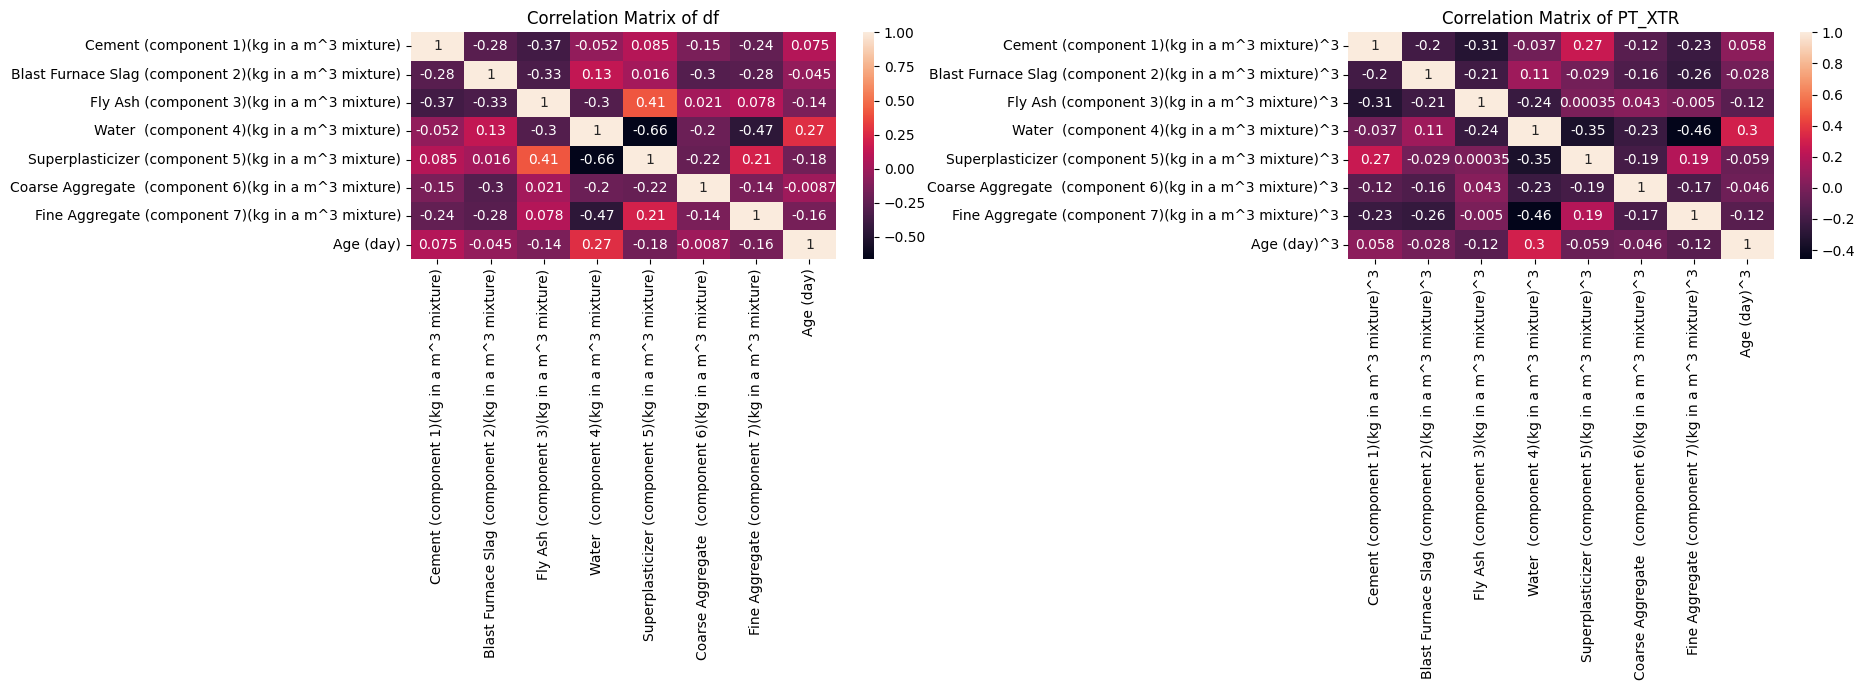

In [ ]:

# This line likely creates a pandas dataframe called 'df'
# ... (your code to create the dataframe 'df')

# Creates a figure with two subplots arranged horizontally
fig, axes = plt.subplots(1, 2,figsize=(19,7))

# Creates a heatmap on the first subplot
#  - 'df.corr()' calculates the correlation matrix of the dataframe 'df'
#  - 'annot=True' displays the correlation values within the heatmap cells
# First heatmap with title
sns.heatmap(X_train.corr(), annot=True, ax=axes[0])
axes[0].set_title('Correlation Matrix of df')

# Second heatmap with title
sns.heatmap(plf_xtr[a].corr(), annot=True, ax=axes[1])
axes[1].set_title('Correlation Matrix of PT_XTR')

plt.tight_layout()
plt.show()

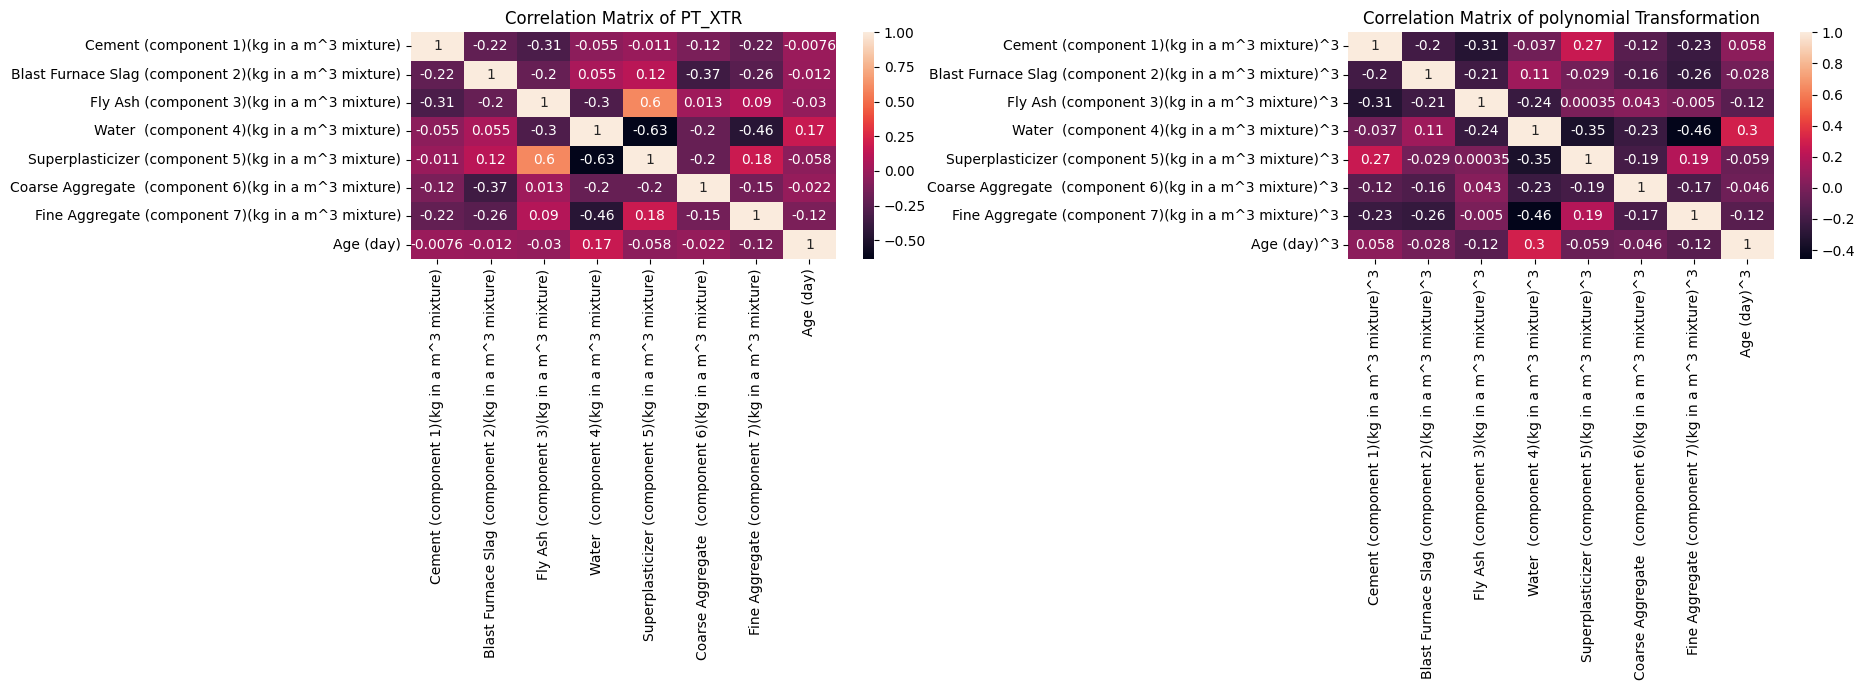

In [ ]:

# This line likely creates a pandas dataframe called 'df'
# ... (your code to create the dataframe 'df')

# Creates a figure with two subplots arranged horizontally
fig, axes = plt.subplots(1, 2,figsize=(19,7))

# Creates a heatmap on the first subplot
#  - 'df.corr()' calculates the correlation matrix of the dataframe 'df'
#  - 'annot=True' displays the correlation values within the heatmap cells
# First heatmap with title
sns.heatmap(PT_XTR.corr(), annot=True, ax=axes[0])
axes[0].set_title('Correlation Matrix of PT_XTR')

# Second heatmap with title
sns.heatmap(plf_xtr[a].corr(), annot=True, ax=axes[1])
axes[1].set_title('Correlation Matrix of polynomial Transformation')

plt.tight_layout()
plt.show()

In [ ]:
print(vif(PT_XTR))

                                   feature       VIF
0              Cement(kg in a m^3 mixture)  2.608969
1  Blast Furnace Slag(kg in a m^3 mixture)  2.915726
2             Fly Ash(kg in a m^3 mixture)  2.792586
3              Water (kg in a m^3 mixture)  4.377360
4    Superplasticizer(kg in a m^3 mixture)  3.621225
5   Coarse Aggregate (kg in a m^3 mixture)  2.947550
6      Fine Aggregate(kg in a m^3 mixture)  3.280983
7                                      Age  1.041084


In [ ]:
print(vif(plf_xtr[a]))

                                     feature        VIF
0              Cement(kg in a m^3 mixture)^3   2.326641
1  Blast Furnace Slag(kg in a m^3 mixture)^3   1.382078
2             Fly Ash(kg in a m^3 mixture)^3   1.625436
3              Water (kg in a m^3 mixture)^3   7.079600
4    Superplasticizer(kg in a m^3 mixture)^3   1.434949
5   Coarse Aggregate (kg in a m^3 mixture)^3  10.600924
6      Fine Aggregate(kg in a m^3 mixture)^3   7.942178
7                                      Age^3   1.148919


Since the VIF for Power has less i.e, less multicollinearity so choosing PowerBhai among PolynomialFeatures

In [ ]:
PT_XTR

Cement(kg in a m^3 mixture)  Blast Furnace Slag(kg in a m^3 mixture)  \
0                      -0.729081                                -1.029344   
1                       0.506113                                 1.203493   
2                       0.371172                                 1.038188   
3                       1.962550                                -1.029344   
4                       1.813581                                -1.029344   
..                           ...                                      ...   
748                     1.128679                                -1.029344   
749                    -1.466950                                 1.126820   
750                    -0.831783                                 1.323145   
751                    -1.176390                                 0.792437   
752                    -1.393994                                 1.249312   

     Fly Ash(kg in a m^3 mixture)  Water (kg in a m^3 mixture)  \
0                       -0.929083                    -0.065109   
1                       -0.929083                    -1.213634   
2                       -0.929083                     1.465381   
3                       -0.929083                     0.351653   
4                       -0.929083                     0.855302   
..                            ...                          ...   
748                     -0.929083                     0.199345   
749                     -0.929083                    -0.486363   
750                     -0.929083                     0.489621   
751                      1.193427                    -0.815868   
752                     -0.929083                     0.855302   

     Superplasticizer(kg in a m^3 mixture)  \
0                                -1.217965   
1                                 1.214631   
2                                 0.366353   
3                                -1.217965   
4                                -1.217965   
..                                     ...   
748                              -1.217965   
749                              -0.434877   
750                              -1.217965   
751                               0.589908   
752                               0.380460   

     Coarse Aggregate (kg in a m^3 mixture)  \
0                                  1.972532   
1                                 -1.555830   
2                                 -1.009262   
3                                  1.972532   
4                                  1.972532   
..                                      ...   
748                                0.858949   
749                                0.330127   
750                               -0.573192   
751                                0.424872   
752                                0.353475   

     Fine Aggregate(kg in a m^3 mixture)       Age  
0                               0.871890 -1.065019  
1                               1.363093  0.102511  
2                              -0.694938  0.102511  
3                              -1.917746 -1.065019  
4                              -1.917746  2.160556  
..                                   ...       ...  
748                            -0.553074 -1.065019  
749                             0.642084  0.102511  
750                            -0.771067  0.102511  
751                            -0.110790  0.102511  
752                            -1.145359  0.102511  

[753 rows x 8 columns]

# Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc2=StandardScaler()

In [ ]:
PT_XTR=sc.fit_transform(PT_XTR)
PT_XTE=sc.transform(PT_XTE)
PT_XTR=pd.DataFrame(PT_XTR, columns=sc.get_feature_names_out())
PT_XTE=pd.DataFrame(PT_XTE,columns=sc.get_feature_names_out())

In [ ]:
plf_xtr=sc2.fit_transform(plf_xtr[a])
plf_xte=sc2.transform(plf_xte[a])
plf_xtr=pd.DataFrame(plf_xtr, columns=sc2.get_feature_names_out())
plf_xte=pd.DataFrame(plf_xte,columns=sc2.get_feature_names_out())

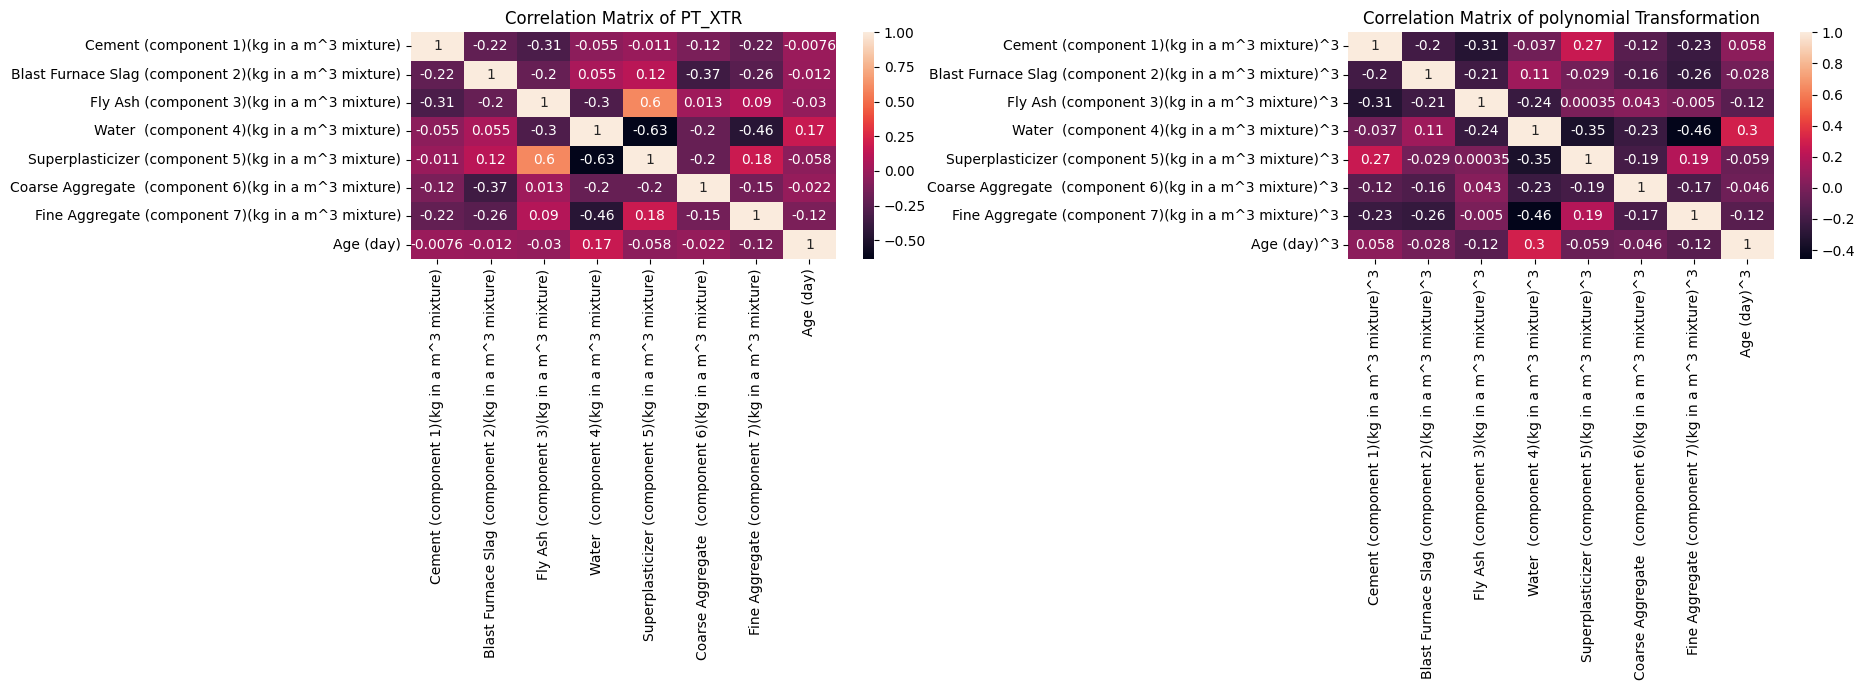

In [ ]:

# This line likely creates a pandas dataframe called 'df'
# ... (your code to create the dataframe 'df')

# Creates a figure with two subplots arranged horizontally
fig, axes = plt.subplots(1, 2,figsize=(19,7))

# Creates a heatmap on the first subplot
#  - 'df.corr()' calculates the correlation matrix of the dataframe 'df'
#  - 'annot=True' displays the correlation values within the heatmap cells
# First heatmap with title
sns.heatmap(PT_XTR.corr(), annot=True, ax=axes[0])
axes[0].set_title('Correlation Matrix of PT_XTR')

# Second heatmap with title
sns.heatmap(plf_xtr.corr(), annot=True, ax=axes[1])
axes[1].set_title('Correlation Matrix of polynomial Transformation')

plt.tight_layout()
plt.show()

In [ ]:
print(vif(plf_xtr))

                                     feature       VIF
0              Cement(kg in a m^3 mixture)^3  1.983909
1  Blast Furnace Slag(kg in a m^3 mixture)^3  1.652346
2             Fly Ash(kg in a m^3 mixture)^3  1.668894
3              Water (kg in a m^3 mixture)^3  2.405944
4    Superplasticizer(kg in a m^3 mixture)^3  1.335775
5   Coarse Aggregate (kg in a m^3 mixture)^3  1.655793
6      Fine Aggregate(kg in a m^3 mixture)^3  2.423075
7                                      Age^3  1.110604


In [ ]:
print(vif(PT_XTR))

                                   feature       VIF
0              Cement(kg in a m^3 mixture)  2.608969
1  Blast Furnace Slag(kg in a m^3 mixture)  2.915726
2             Fly Ash(kg in a m^3 mixture)  2.792586
3              Water (kg in a m^3 mixture)  4.377360
4    Superplasticizer(kg in a m^3 mixture)  3.621225
5   Coarse Aggregate (kg in a m^3 mixture)  2.947550
6      Fine Aggregate(kg in a m^3 mixture)  3.280983
7                                      Age  1.041084


# Polynomial Transformation has less value in both Corr and VIF.(compared to Power)

# Machine Learning

In [ ]:
plf_xtr

Cement(kg in a m^3 mixture)^3  Blast Furnace Slag(kg in a m^3 mixture)^3  \
0                        -0.704071                                  -0.476854   
1                         0.037382                                   1.435325   
2                        -0.096836                                   0.068784   
3                         3.449859                                  -0.476854   
4                         2.851150                                  -0.476854   
..                             ...                                        ...   
748                       0.954144                                  -0.476854   
749                      -0.848656                                   0.591133   
750                      -0.732091                                   4.283390   
751                      -0.805639                                  -0.391433   
752                      -0.839183                                   2.233394   

     Fly Ash(kg in a m^3 mixture)^3  Water (kg in a m^3 mixture)^3  \
0                         -0.649095                      -0.188421   
1                         -0.649095                      -1.117882   
2                         -0.649095                       1.573340   
3                         -0.649095                       0.226864   
4                         -0.649095                       0.790985   
..                              ...                            ...   
748                       -0.649095                       0.069879   
749                       -0.649095                      -0.564186   
750                       -0.649095                       0.374416   
751                        2.478736                      -0.829297   
752                       -0.649095                       0.790985   

     Superplasticizer(kg in a m^3 mixture)^3  \
0                                  -0.330771   
1                                   0.596064   
2                                  -0.255232   
3                                  -0.330771   
4                                  -0.330771   
..                                       ...   
748                                -0.330771   
749                                -0.328235   
750                                -0.330771   
751                                -0.173907   
752                                -0.251518   

     Coarse Aggregate (kg in a m^3 mixture)^3  \
0                                    2.175798   
1                                   -1.452556   
2                                   -1.004469   
3                                    2.175798   
4                                    2.175798   
..                                        ...   
748                                  0.837299   
749                                  0.265822   
750                                 -0.618179   
751                                  0.365236   
752                                  0.290201   

     Fine Aggregate(kg in a m^3 mixture)^3     Age^3  
0                                 0.857945 -0.203204  
1                                 1.411403 -0.200123  
2                                -0.725763 -0.200123  
3                                -1.753577 -0.203204  
4                                -1.753577  2.603251  
..                                     ...       ...  
748                              -0.594261 -0.203204  
749                               0.608086 -0.200123  
750                              -0.795314 -0.200123  
751                              -0.168729 -0.200123  
752                              -1.126772 -0.200123  

[753 rows x 8 columns]

## Linear Regression

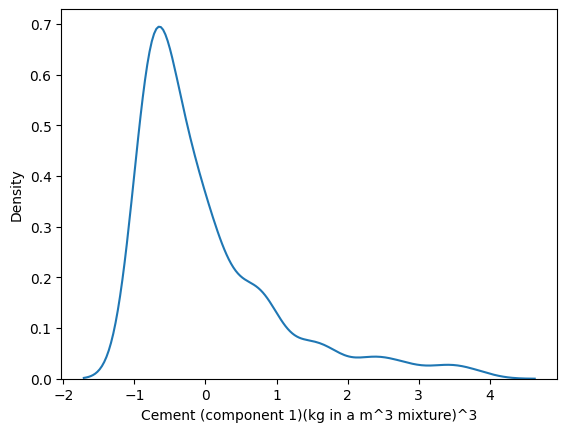

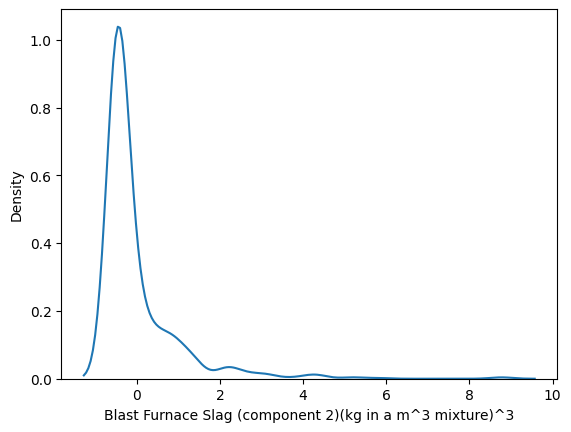

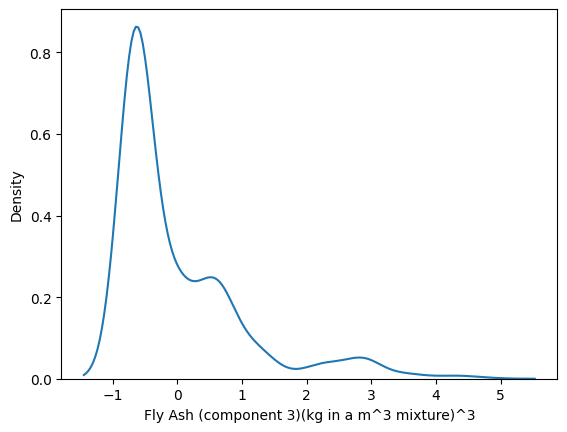

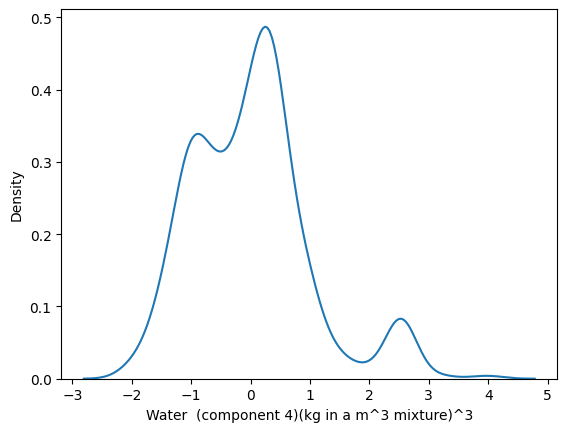

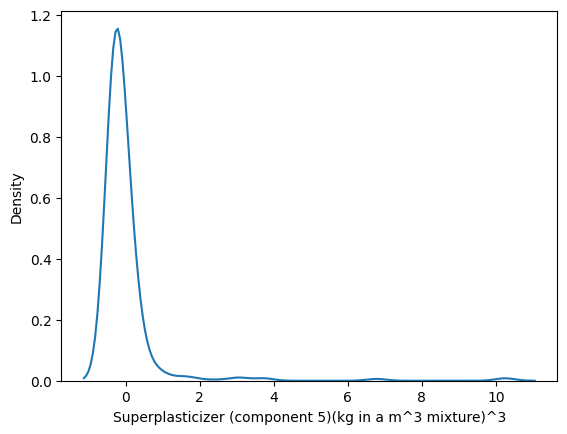

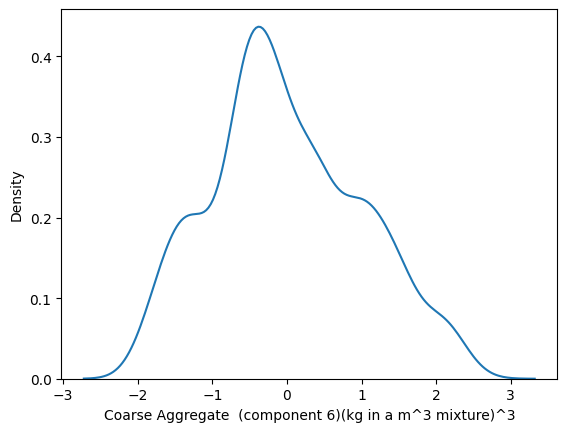

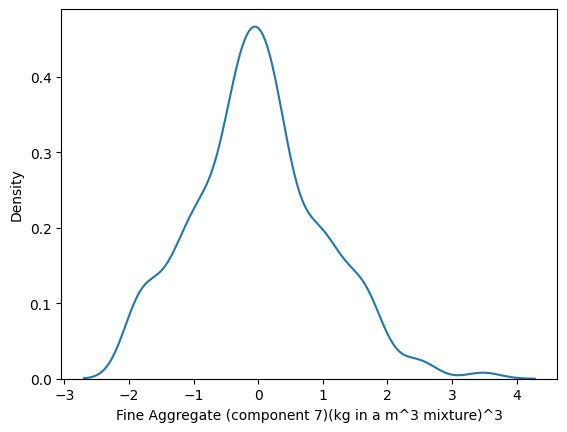

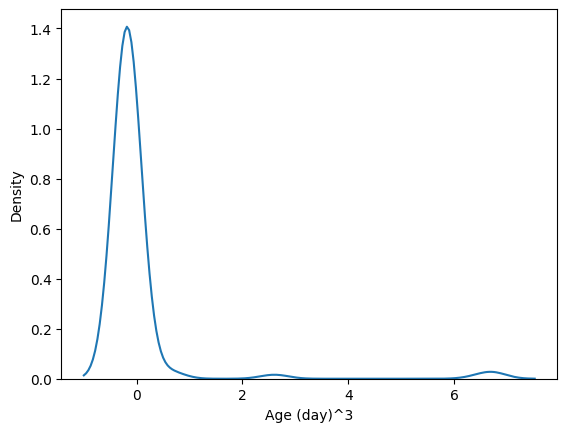

In [ ]:
for i in plf_xtr.columns:
    sns.kdeplot(plf_xtr[i])
    plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression,ElasticNet,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
Lr=LinearRegression()
el=ElasticNet()
rd=Ridge()
Ls=Lasso()
Lr2=LinearRegression()
el2=ElasticNet()
rd2=Ridge()
Ls2=Lasso()

In [ ]:
def ML_metrics(model1,model2):
    
    
    print(50*"*","Train data results",50*"*")
    
    print(50*">","Polynomial  Enters",50*">")
    model1.fit(plf_xtr,y_train)
    model1_pred=model1.predict(plf_xtr)
    print('Accuracy : ',r2_score(y_train,model1_pred))
    print('MSE : ',mean_absolute_error(y_train,model1_pred))
    print('MAE : ',mean_squared_error(y_train,model1_pred))
    print('RMSE : ',np.sqrt(mean_squared_error(y_train,model1_pred)))
    
    print(50*">","Power  Enters",50*">")
    model2.fit(PT_XTR,y_train)
    model2_pred=model2.predict(PT_XTR)
    print('Accuracy : ',r2_score(y_train,model2_pred))
    print('MSE : ',mean_absolute_error(y_train,model2_pred))
    print('MAE : ',mean_squared_error(y_train,model2_pred))
    print('RMSE : ',np.sqrt(mean_squared_error(y_train,model2_pred)))
   
   
   
    print()
    print(50*"*","Test data results",50*"*")
    
    print(50*">","Polynomial  Enters",50*">")
    model1.fit(plf_xtr,y_train)
    model1_pred=model1.predict(plf_xte)
    print('Accuracy : ',r2_score(y_test,model1_pred))
    print('MSE : ',mean_absolute_error(y_test,model1_pred))
    print('MAE : ',mean_squared_error(y_test,model1_pred))
    print('RMSE : ',np.sqrt(mean_squared_error(y_test,model1_pred)))
    
    print(50*">","Power Enters",50*">")
    model2.fit(PT_XTR,y_train)
    model2_pred=model2.predict(PT_XTE)
    print('Accuracy : ',r2_score(y_test,model2_pred))
    print('MSE : ',mean_absolute_error(y_test,model2_pred))
    print('MAE : ',mean_squared_error(y_test,model2_pred))
    print('RMSE : ',np.sqrt(mean_squared_error(y_test,model2_pred)))
    

In [ ]:
ML_metrics(Lr,Lr2)

************************************************** Train data results **************************************************
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Polynomial Bhai Enters >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Accuracy :  0.39106980542628966
MSE :  10.21743538285177
MAE :  157.8269321906315
RMSE :  12.56291893592534
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Power Bhai Enters >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Accuracy :  0.7975295770307982
MSE :  5.571466753564713
MAE :  52.47774868339286
RMSE :  7.244152723638069

************************************************** Test data results **************************************************
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Polynomial Bhai Enters >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Accuracy :  0.42518430152514486
MSE :  10.341340409367485
MAE :  162.04692754805296
RMSE :  12.729765416065332
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Power Bhai 

In [ ]:
ML_metrics(rd,rd2)

************************************************** Train data results **************************************************
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Polynomial Bhai Enters >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Accuracy :  0.39106520363475816
MSE :  10.217162679318664
MAE :  157.82812491624514
RMSE :  12.562966405918832
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Power Bhai Enters >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Accuracy :  0.797526994338631
MSE :  5.571695220139573
MAE :  52.47841808422927
RMSE :  7.24419892632921

************************************************** Test data results **************************************************
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Polynomial Bhai Enters >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Accuracy :  0.424824343127001
MSE :  10.343624580393492
MAE :  162.1484038170886
RMSE :  12.73375057934969
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Power Bhai Ent

In [ ]:
ML_metrics(Ls,Ls2)

************************************************** Train data results **************************************************
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Polynomial Bhai Enters >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Accuracy :  0.3425176906451948
MSE :  10.606411148391535
MAE :  170.41102047456374
RMSE :  13.054157210427785
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Power Bhai Enters >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Accuracy :  0.7713258367180509
MSE :  5.947702016744507
MAE :  59.26942362796694
RMSE :  7.698663756001228

************************************************** Test data results **************************************************
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Polynomial Bhai Enters >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Accuracy :  0.3547499103178827
MSE :  11.026642515029806
MAE :  181.90316445866287
RMSE :  13.487148121773664
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Power Bhai

In [ ]:
ML_metrics(el,el2)

************************************************** Train data results **************************************************
Accuracy :  0.2959506019497329
MSE :  10.958039157274657
MAE :  182.48061534002926
RMSE :  13.50853860859972
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Power Bhai Enters >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Accuracy :  0.6738089780953918
MSE :  7.339727640383796
MAE :  84.54454838024886
RMSE :  9.194810948586646
************************************************** Test data results **************************************************
Accuracy :  0.2971713888945078
MSE :  11.478948659181542
MAE :  198.13518893915955
RMSE :  14.076050189565237
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Power Bhai Enters >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Accuracy :  0.6644626476325574
MSE :  7.7706540529651384
MAE :  94.59170508567972
RMSE :  9.725826704485318


# SVM Model

In [ ]:
from sklearn.svm import SVR
svr=SVR()
svr2=SVR()

In [ ]:
ML_metrics(svr,svr2)

************************************************** Train data results **************************************************
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Polynomial Bhai Enters >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Accuracy :  0.37646721217700796
MSE :  10.100564283898802
MAE :  161.61173792879197
RMSE :  12.712660536991931
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Power Bhai Enters >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Accuracy :  0.7915509779818367
MSE :  5.3799305375460875
MAE :  54.02732522780447
RMSE :  7.35032823946009

************************************************** Test data results **************************************************
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Polynomial Bhai Enters >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Accuracy :  0.35591911062790593
MSE :  10.785173284297644
MAE :  181.57355390969875
RMSE :  13.47492315041903
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Power Bha

# RandomForest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
rd=RandomForestRegressor()
rd2=RandomForestRegressor()
etr=ExtraTreesRegressor()
etr2=ExtraTreesRegressor()

In [ ]:
ML_metrics(rd,rd2)

************************************************** Train data results **************************************************
Accuracy :  0.39106520363475816
MSE :  10.217162679318664
MAE :  157.82812491624514
RMSE :  12.562966405918832
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Power Bhai Enters >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Accuracy :  0.797526994338631
MSE :  5.571695220139573
MAE :  52.47841808422927
RMSE :  7.24419892632921
************************************************** Test data results **************************************************
Accuracy :  0.424824343127001
MSE :  10.343624580393492
MAE :  162.1484038170886
RMSE :  12.73375057934969
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Power Bhai Enters >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Accuracy :  0.7997356687246022
MSE :  5.788264714134853
MAE :  56.456738510705904
RMSE :  7.513769926655055


In [ ]:
ML_metrics(etr,etr2)

************************************************** Train data results **************************************************
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Polynomial Bhai Enters >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Accuracy :  0.9999353410673262
MSE :  0.013471662535842411
MAE :  0.016758769845164903
RMSE :  0.1294556674895499
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Power Bhai Enters >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Accuracy :  0.9999353410673262
MSE :  0.013471662535842411
MAE :  0.016758769845164903
RMSE :  0.1294556674895499

************************************************** Test data results **************************************************
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Polynomial Bhai Enters >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Accuracy :  0.8820529755345634
MSE :  3.640472475442729
MAE :  33.25057575631803
RMSE :  5.7663312215236155
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> P

In [ ]:
## Bagging 
from sklearn.ensemble import BaggingRegressor
bag1=BaggingRegressor(estimator=SVR(),n_estimators=30)
bag2=BaggingRegressor(estimator=SVR(),n_estimators=30)
bag3=BaggingRegressor(estimator=RandomForestRegressor(),n_estimators=30)
bag4=BaggingRegressor(estimator=RandomForestRegressor(),n_estimators=30)
bag5=BaggingRegressor(estimator=LinearRegression(),n_estimators=30)
bag6=BaggingRegressor(estimator=LinearRegression(),n_estimators=30)

In [ ]:
ML_metrics(bag1,bag2)

************************************************** Train data results **************************************************
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Polynomial Bhai Enters >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Accuracy :  0.38076478092538135
MSE :  10.110552238465147
MAE :  160.49786297649314
RMSE :  12.668775117448929
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Power Bhai Enters >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Accuracy :  0.7897080530644107
MSE :  5.4275557030905786
MAE :  54.5049878376848
RMSE :  7.382749341382572

************************************************** Test data results **************************************************
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Polynomial Bhai Enters >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Accuracy :  0.3567143072967768
MSE :  10.778689059948277
MAE :  181.3493791397179
RMSE :  13.46660236064457
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Power Bhai 

In [ ]:
ML_metrics(bag3,bag4)

************************************************** Train data results **************************************************
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Polynomial Bhai Enters >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Accuracy :  0.9596740071896173
MSE :  2.4399741150914798
MAE :  10.451982492442731
RMSE :  3.232952596689709
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Power Bhai Enters >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Accuracy :  0.9594474903166765
MSE :  2.4228533035483966
MAE :  10.510692773956501
RMSE :  3.242019860203898

************************************************** Test data results **************************************************
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Polynomial Bhai Enters >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Accuracy :  0.8862915354919253
MSE :  3.9657460371531825
MAE :  32.05567864383294
RMSE :  5.6617734539482365
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Power Bhai

In [ ]:
ML_metrics(bag5,bag6)

************************************************** Train data results **************************************************
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Polynomial Bhai Enters >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Accuracy :  0.3906788907744172
MSE :  10.223088677204524
MAE :  157.92825227756953
RMSE :  12.566950794746095
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Power Bhai Enters >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Accuracy :  0.797467477386401
MSE :  5.573702490836348
MAE :  52.49384411839128
RMSE :  7.245263564453075

************************************************** Test data results **************************************************
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Polynomial Bhai Enters >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Accuracy :  0.4257479612401561
MSE :  10.33609474755852
MAE :  161.8880256161076
RMSE :  12.723522531756196
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Power Bhai En

# Stacking

In [ ]:
from sklearn.ensemble import StackingRegressor
estimators=[('LR',LinearRegression()),('ls',Lasso()),('rd',Ridge()),('svr',SVR())]
st1=StackingRegressor(estimators=estimators,final_estimator=RandomForestRegressor())
st2=StackingRegressor(estimators=estimators,final_estimator=RandomForestRegressor())

In [ ]:
ML_metrics(st1,st2)

************************************************** Train data results **************************************************
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Polynomial Bhai Enters >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Accuracy :  0.47352762581145236
MSE :  9.218220447728811
MAE :  136.45491788999885
RMSE :  11.681391950020291
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Power Bhai Enters >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Accuracy :  0.8872916180874462
MSE :  4.012951241255334
MAE :  29.212573638069372
RMSE :  5.404865737284264

************************************************** Test data results **************************************************
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Polynomial Bhai Enters >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Accuracy :  0.3757723286673801
MSE :  10.693940340966476
MAE :  175.97671131515173
RMSE :  13.265621407048814
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Power Bha

In [ ]:
Models={'LinearRegression':LinearRegression(),'Ridge':Ridge(),'Lasso':Lasso(),'ElasticNet':ElasticNet(),'SVR':SVR(),'RandomForestRegressor':RandomForestRegressor(),'ExtraTreesRegressor':ExtraTreesRegressor(),'BaggingRegressor':BaggingRegressor(estimator=SVR(),n_estimators=30),'StackingRegressor':StackingRegressor(estimators=estimators,final_estimator=RandomForestRegressor())}

In [ ]:
Models

{'LinearRegression': LinearRegression(),
 'Ridge': Ridge(),
 'Lasso': Lasso(),
 'ElasticNet': ElasticNet(),
 'SVR': SVR(),
 'RandomForestRegressor': RandomForestRegressor(),
 'ExtraTreesRegressor': ExtraTreesRegressor(),
 'BaggingRegressor': BaggingRegressor(estimator=SVR(), n_estimators=30),
 'StackingRegressor': StackingRegressor(estimators=[('LR', LinearRegression()), ('ls', Lasso()),
                               ('rd', Ridge()), ('svr', SVR())],
                   final_estimator=RandomForestRegressor())}

In [ ]:
def ML_metrics_df(Models):
    
    
    columns_acc=['Algorithmn','Polynomial_Train_r2score','Polynomial_Test_r2score','Polynomial_Diff(Train-Test)','Power_Train_r2score','Power_Test_r2score','Power_Diff(Train-Test)']
    columns_errors=['Algorithmn','Polynomial_Train_mae','Polynomial_Test_mae','Power_Train_mae','Power_Test_mae','Polynomial_Train_mse','Polynomial_Test_mse',
                        'Power_Train_mse','Power_Test_mse','Polynomial_Train_rmse','Polynomial_Test_rmse','Power_Train_rmse','Power_Test_rmse']
    df_accs=pd.DataFrame(columns=columns_acc)
    df_errors=pd.DataFrame(columns=columns_errors)
    

    for i,j in Models.items():
        model1=j
        model2=j
        cv_1=cross_val_score(model1,plf_xtr,y_train,cv=5)
        model1.fit(plf_xtr,y_train)
        model1_pred=model1.predict(plf_xtr)

        Train_Polynomial_r2score=r2_score(y_train,model1_pred)
        Train_Polynomial_MAE=mean_absolute_error(y_train,model1_pred)
        Train_Polynomial_MSE=mean_squared_error(y_train,model1_pred)
        Train_Polynomial_RMSE=np.sqrt(mean_squared_error(y_train,model1_pred))
        
       
        model2.fit(PT_XTR,y_train)
        model2_pred=model2.predict(PT_XTR)
        cv_2=cross_val_score(model2,PT_XTR,y_train,cv=5)
        Train_Power_r2score=r2_score(y_train,model2_pred)
        Train_Power_MAE=mean_absolute_error(y_train,model2_pred)
        Train_Power_MSE=mean_squared_error(y_train,model2_pred)
        Train_Power_RMSE=np.sqrt(mean_squared_error(y_train,model2_pred))
    
    

        model1.fit(plf_xtr,y_train)
        model1_pred=model1.predict(plf_xte)

        Test_Polynomial_r2score=r2_score(y_test,model1_pred)
        Test_Polynomial_MAE=mean_absolute_error(y_test,model1_pred)
        Test_Polynomial_MSE=mean_squared_error(y_test,model1_pred)
        Test_Polynomial_RMSE=np.sqrt(mean_squared_error(y_test,model1_pred))
        
        

        model2.fit(PT_XTR,y_train)
        model2_pred=model2.predict(PT_XTE)

        Test_Power_r2score=r2_score(y_test,model2_pred)
        Test_Power_MAE=mean_absolute_error(y_test,model2_pred)
        Test_Power_MSE=mean_squared_error(y_test,model2_pred)
        Test_Power_RMSE=np.sqrt(mean_squared_error(y_test,model2_pred))
        
        
        
        
        m = {'Algorithmn': i, 'Polynomial_Train_r2score': Train_Polynomial_r2score, 'Polynomial_Test_r2score': Test_Polynomial_r2score, 'Polynomial_Diff(Train-Test)':(Train_Polynomial_r2score-Test_Polynomial_r2score),'Power_Train_r2score': Train_Power_r2score, 'Power_Test_r2score': Test_Power_r2score,'Power_Diff(Train-Test)':(Train_Power_r2score-Test_Power_r2score),'CV_polynomial':cv_1.mean(),"cv_power":cv_2.mean()}
        m = pd.DataFrame([m])  # Convert to a DataFrame with a single row

        df_accs = pd.concat([df_accs, m], ignore_index=True)
        f={'Algorithmn':i,'Polynomial_Train_mae':Train_Polynomial_MAE,'Polynomial_Test_mae':Test_Polynomial_MAE,'Power_Train_mae':Train_Power_MAE,'Power_Test_mae':Test_Power_MAE,'Polynomial_Train_mse':Train_Polynomial_MSE,'Polynomial_Test_mse':Test_Polynomial_MSE,
                        'Power_Train_mse':Train_Power_MSE,'Power_Test_mse':Test_Power_MSE,'Polynomial_Train_rmse':Train_Polynomial_RMSE,'Polynomial_Test_rmse':Test_Polynomial_RMSE,'Power_Train_rmse':Train_Power_RMSE,'Power_Test_rmse':Test_Power_RMSE}
        f = pd.DataFrame([f])
        df_errors=pd.concat([df_errors, f], ignore_index=True)
        
    return df_accs,df_errors


df_accs,df_errors=ML_metrics_df(Models)    

In [ ]:
df_accs

Algorithmn  Polynomial_Train_r2score  Polynomial_Test_r2score  \
0       LinearRegression                  0.391070                 0.425184   
1                  Ridge                  0.391065                 0.424824   
2                  Lasso                  0.342518                 0.354750   
3             ElasticNet                  0.295951                 0.297171   
4                    SVR                  0.376467                 0.355919   
5  RandomForestRegressor                  0.986282                 0.894270   
6    ExtraTreesRegressor                  0.999935                 0.878945   
7       BaggingRegressor                  0.371136                 0.350880   
8      StackingRegressor                  0.474497                 0.380625   

   Polynomial_Diff(Train-Test)  Power_Train_r2score  Power_Test_r2score  \
0                    -0.034114             0.797530            0.799842   
1                    -0.033759             0.797527            0.799736   
2                    -0.012232             0.771326            0.770334   
3                    -0.001221             0.673809            0.664463   
4                     0.020548             0.791551            0.742945   
5                     0.092012             0.986171            0.896557   
6                     0.120990             0.999935            0.904524   
7                     0.020256             0.792480            0.738317   
8                     0.093873             0.885987            0.819484   

   Power_Diff(Train-Test)  CV_polynomial  cv_power  
0               -0.002313       0.371243  0.793091  
1               -0.002209       0.371257  0.793104  
2                0.000992       0.326491  0.767998  
3                0.009346       0.280602  0.670128  
4                0.048606       0.330721  0.742859  
5                0.089615       0.886792  0.887771  
6                0.095411       0.880487  0.894888  
7                0.054164       0.326591  0.742862  
8                0.066503       0.278199  0.814417

In [ ]:
df_errors

Algorithmn  Polynomial_Train_mae  Polynomial_Test_mae  \
0       LinearRegression             10.217435            10.341340   
1                  Ridge             10.217163            10.343625   
2                  Lasso             10.606411            11.026643   
3             ElasticNet             10.958039            11.478949   
4                    SVR             10.100564            10.785173   
5  RandomForestRegressor              1.362460             3.562460   
6    ExtraTreesRegressor              0.013472             3.681371   
7       BaggingRegressor             10.159643            10.829248   
8      StackingRegressor              9.196644            10.627159   

   Power_Train_mae  Power_Test_mae  Polynomial_Train_mse  Polynomial_Test_mse  \
0         5.571467        5.787007            157.826932           162.046928   
1         5.571695        5.788265            157.828125           162.148404   
2         5.947702        6.149251            170.411020           181.903164   
3         7.339728        7.770654            182.480615           198.135189   
4         5.379931        6.147213            161.611738           181.573554   
5         1.354525        3.484560              3.555548            29.806549   
6         0.013472        3.177710              0.016759            34.126658   
7         5.383314        6.238936            162.993408           182.994118   
8         3.996626        5.238779            136.203576           174.608827   

   Power_Train_mse  Power_Test_mse  Polynomial_Train_rmse  \
0        52.477749       56.426675              12.562919   
1        52.478418       56.456739              12.562966   
2        59.269424       64.745497              13.054157   
3        84.544548       94.591705              13.508539   
4        54.027325       72.466543              12.712661   
5         3.584289       29.161860               1.885616   
6         0.016759       26.915604               0.129456   
7        53.786444       73.771389              12.766887   
8        29.550625       50.889401              11.670629   

   Polynomial_Test_rmse  Power_Train_rmse  Power_Test_rmse  
0             12.729765          7.244153         7.511769  
1             12.733751          7.244199         7.513770  
2             13.487148          7.698664         8.046459  
3             14.076050          9.194811         9.725827  
4             13.474923          7.350328         8.512728  
5              5.459537          1.893222         5.400172  
6              5.841803          0.129456         5.188025  
7             13.527532          7.333924         8.589027  
8             13.213963          5.436049         7.133681

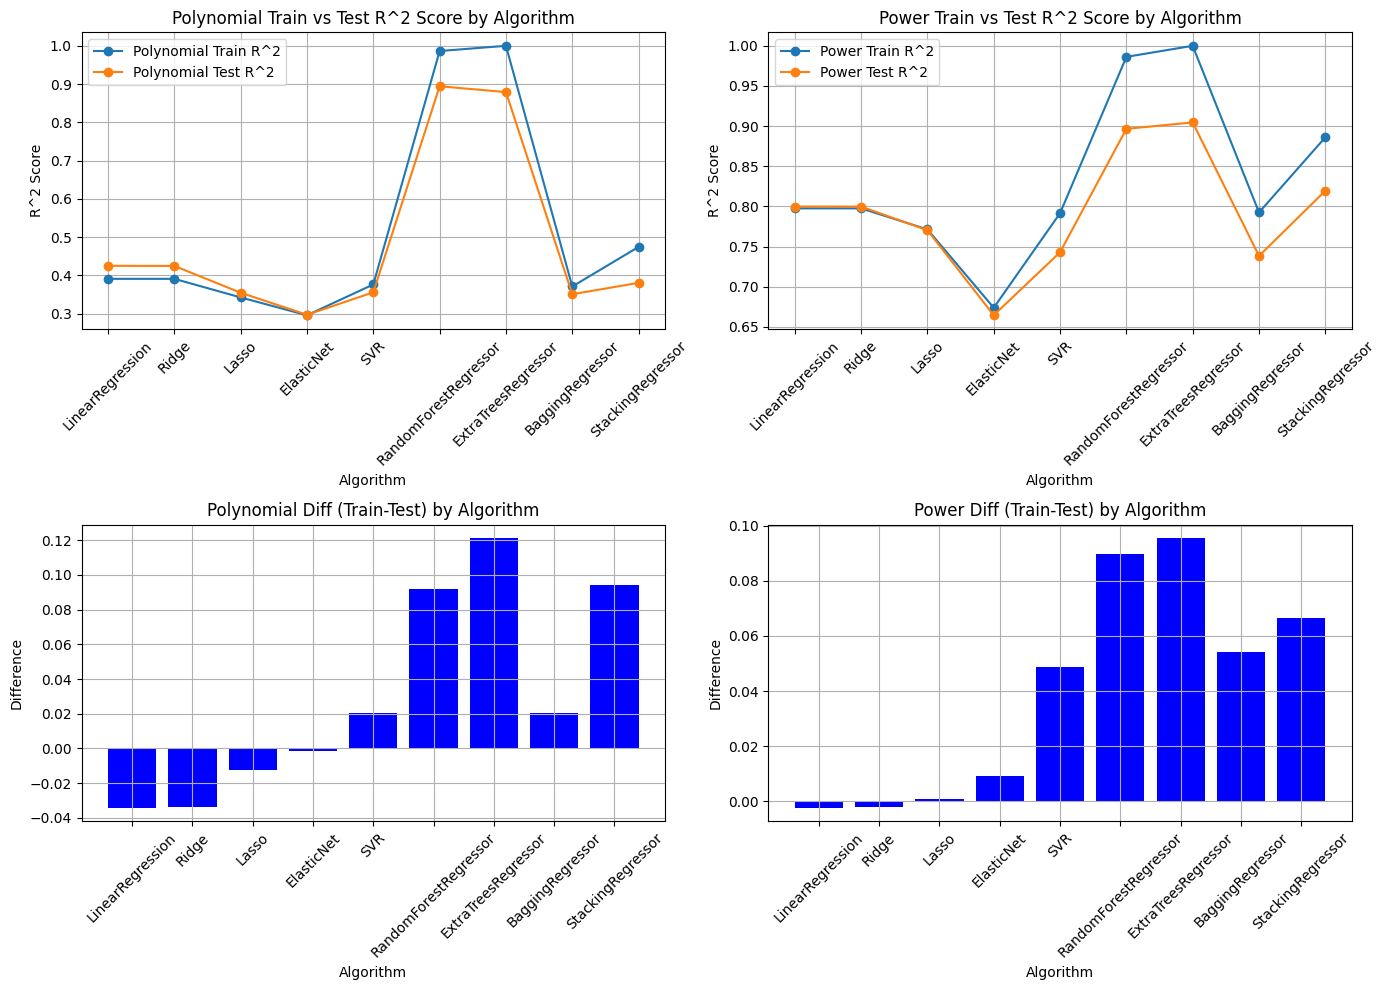

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file

# Set up the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Polynomial Train vs. Test R^2 Scores
axs[0, 0].plot(df_accs['Algorithmn'], df_accs['Polynomial_Train_r2score'], label='Polynomial Train R^2', marker='o')
axs[0, 0].plot(df_accs['Algorithmn'], df_accs['Polynomial_Test_r2score'], label='Polynomial Test R^2', marker='o')
axs[0, 0].set_title('Polynomial Train vs Test R^2 Score by Algorithm')
axs[0, 0].set_xlabel('Algorithm')
axs[0, 0].set_ylabel('R^2 Score')
axs[0, 0].legend()
axs[0, 0].grid(True)
axs[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Power Train vs. Test R^2 Scores
axs[0, 1].plot(df_accs['Algorithmn'], df_accs['Power_Train_r2score'], label='Power Train R^2', marker='o')
axs[0, 1].plot(df_accs['Algorithmn'], df_accs['Power_Test_r2score'], label='Power Test R^2', marker='o')
axs[0, 1].set_title('Power Train vs Test R^2 Score by Algorithm')
axs[0, 1].set_xlabel('Algorithm')
axs[0, 1].set_ylabel('R^2 Score')
axs[0, 1].legend()
axs[0, 1].grid(True)
axs[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Polynomial Diff (Train-Test)
axs[1, 0].bar(df_accs['Algorithmn'], df_accs['Polynomial_Diff(Train-Test)'], color='blue')
axs[1, 0].set_title('Polynomial Diff (Train-Test) by Algorithm')
axs[1, 0].set_xlabel('Algorithm')
axs[1, 0].set_ylabel('Difference')
axs[1, 0].grid(True)
axs[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Power Diff (Train-Test)
axs[1, 1].bar(df_accs['Algorithmn'], df_accs['Power_Diff(Train-Test)'], color='blue')
axs[1, 1].set_title('Power Diff (Train-Test) by Algorithm')
axs[1, 1].set_xlabel('Algorithm')
axs[1, 1].set_ylabel('Difference')
axs[1, 1].grid(True)
axs[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()


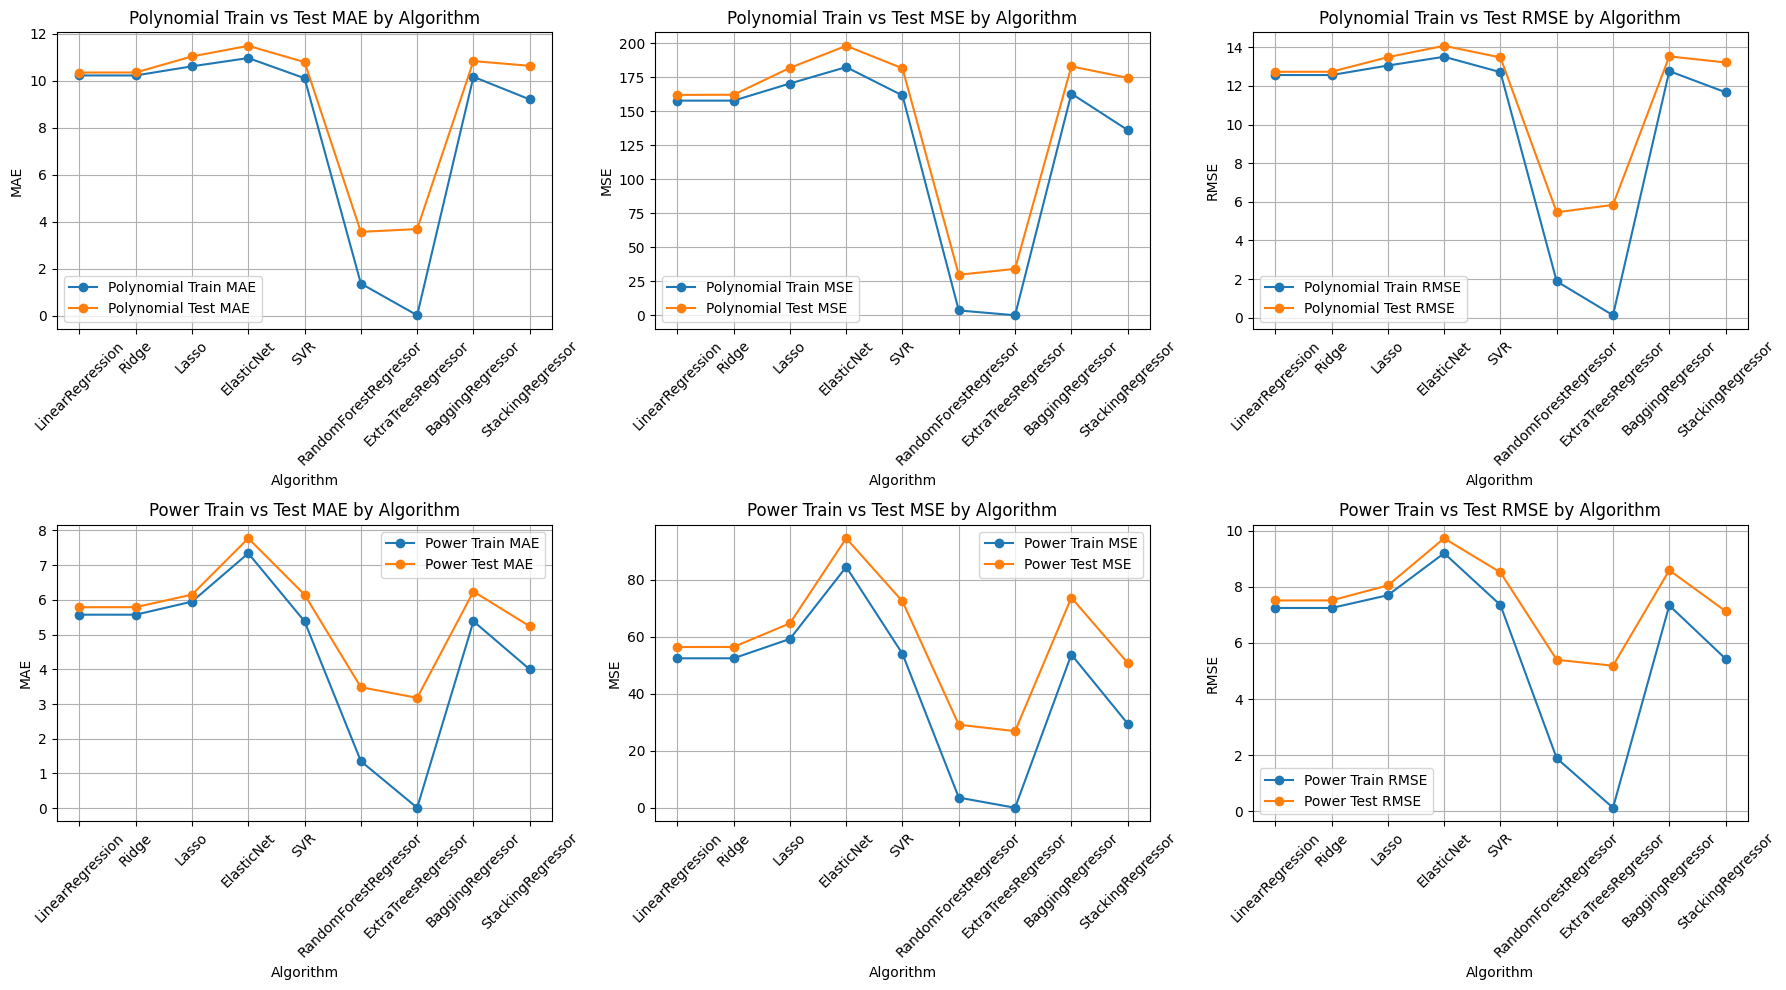

In [ ]:

# Set up the figure and axes
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Plot 1: Polynomial Train vs. Test MAE
axs[0, 0].plot(df_errors['Algorithmn'], df_errors['Polynomial_Train_mae'], label='Polynomial Train MAE', marker='o')
axs[0, 0].plot(df_errors['Algorithmn'], df_errors['Polynomial_Test_mae'], label='Polynomial Test MAE', marker='o')
axs[0, 0].set_title('Polynomial Train vs Test MAE by Algorithm')
axs[0, 0].set_xlabel('Algorithm')
axs[0, 0].set_ylabel('MAE')
axs[0, 0].legend()
axs[0, 0].grid(True)
axs[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Polynomial Train vs. Test MSE
axs[0, 1].plot(df_errors['Algorithmn'], df_errors['Polynomial_Train_mse'], label='Polynomial Train MSE', marker='o')
axs[0, 1].plot(df_errors['Algorithmn'], df_errors['Polynomial_Test_mse'], label='Polynomial Test MSE', marker='o')
axs[0, 1].set_title('Polynomial Train vs Test MSE by Algorithm')
axs[0, 1].set_xlabel('Algorithm')
axs[0, 1].set_ylabel('MSE')
axs[0, 1].legend()
axs[0, 1].grid(True)
axs[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Polynomial Train vs. Test RMSE
axs[0, 2].plot(df_errors['Algorithmn'], df_errors['Polynomial_Train_rmse'], label='Polynomial Train RMSE', marker='o')
axs[0, 2].plot(df_errors['Algorithmn'], df_errors['Polynomial_Test_rmse'], label='Polynomial Test RMSE', marker='o')
axs[0, 2].set_title('Polynomial Train vs Test RMSE by Algorithm')
axs[0, 2].set_xlabel('Algorithm')
axs[0, 2].set_ylabel('RMSE')
axs[0, 2].legend()
axs[0, 2].grid(True)
axs[0, 2].tick_params(axis='x', rotation=45)

# Plot 4: Power Train vs. Test MAE
axs[1, 0].plot(df_errors['Algorithmn'], df_errors['Power_Train_mae'], label='Power Train MAE', marker='o')
axs[1, 0].plot(df_errors['Algorithmn'], df_errors['Power_Test_mae'], label='Power Test MAE', marker='o')
axs[1, 0].set_title('Power Train vs Test MAE by Algorithm')
axs[1, 0].set_xlabel('Algorithm')
axs[1, 0].set_ylabel('MAE')
axs[1, 0].legend()
axs[1, 0].grid(True)
axs[1, 0].tick_params(axis='x', rotation=45)

# Plot 5: Power Train vs. Test MSE
axs[1, 1].plot(df_errors['Algorithmn'], df_errors['Power_Train_mse'], label='Power Train MSE', marker='o')
axs[1, 1].plot(df_errors['Algorithmn'], df_errors['Power_Test_mse'], label='Power Test MSE', marker='o')
axs[1, 1].set_title('Power Train vs Test MSE by Algorithm')
axs[1, 1].set_xlabel('Algorithm')
axs[1, 1].set_ylabel('MSE')
axs[1, 1].legend()
axs[1, 1].grid(True)
axs[1, 1].tick_params(axis='x', rotation=45)

# Plot 6: Power Train vs. Test RMSE
axs[1, 2].plot(df_errors['Algorithmn'], df_errors['Power_Train_rmse'], label='Power Train RMSE', marker='o')
axs[1, 2].plot(df_errors['Algorithmn'], df_errors['Power_Test_rmse'], label='Power Test RMSE', marker='o')
axs[1, 2].set_title('Power Train vs Test RMSE by Algorithm')
axs[1, 2].set_xlabel('Algorithm')
axs[1, 2].set_ylabel('RMSE')
axs[1, 2].legend()
axs[1, 2].grid(True)
axs[1, 2].tick_params(axis='x', rotation=45)

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()


# Hyperparameter Tunning

In [ ]:
from sklearn.linear_model import SGDRegressor
model1=SGDRegressor()
model2=SGDRegressor()

In [ ]:
Models['SGD']=SGDRegressor()

In [ ]:
ML_metrics(model1,model2)

************************************************** Train data results **************************************************
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Polynomial Bhai Enters >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Accuracy :  0.3909713275980017
MSE :  10.21679494946862
MAE :  157.85245638645227
RMSE :  12.563934749371006
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Power Bhai Enters >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Accuracy :  0.7974852949232774
MSE :  5.577718222986961
MAE :  52.489226040310356
RMSE :  7.2449448610952425

************************************************** Test data results **************************************************
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Polynomial Bhai Enters >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Accuracy :  0.42502269998184217
MSE :  10.340053588211715
MAE :  162.0924848173633
RMSE :  12.731554689721255
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Power Bha

In [ ]:
df_accs,df_errors=ML_metrics_df(Models)

In [ ]:
df_accs

Algorithmn  Polynomial_Train_r2score  Polynomial_Test_r2score  \
0       LinearRegression                  0.391070                 0.425184   
1                  Ridge                  0.391065                 0.424824   
2                  Lasso                  0.342518                 0.354750   
3             ElasticNet                  0.295951                 0.297171   
4                    SVR                  0.376467                 0.355919   
5  RandomForestRegressor                  0.986180                 0.891010   
6    ExtraTreesRegressor                  0.999935                 0.876172   
7       BaggingRegressor                  0.371406                 0.357358   
8      StackingRegressor                  0.465954                 0.375125   
9                    SGD                  0.390957                 0.425638   

   Power_Train_r2score  Power_Test_r2score  CV_polynomial  cv_power  
0             0.797530            0.799842       0.371243  0.793091  
1             0.797527            0.799736       0.371257  0.793104  
2             0.771326            0.770334       0.326491  0.767998  
3             0.673809            0.664463       0.280602  0.670128  
4             0.791551            0.742945       0.330721  0.742859  
5             0.986253            0.896959       0.884946  0.888851  
6             0.999935            0.902405       0.877866  0.894758  
7             0.793145            0.742504       0.330200  0.741151  
8             0.887911            0.819896       0.282342  0.816377  
9             0.797478            0.799147       0.371414  0.793278

In [ ]:
Models

{'LinearRegression': LinearRegression(),
 'Ridge': Ridge(),
 'Lasso': Lasso(),
 'ElasticNet': ElasticNet(),
 'SVR': SVR(),
 'RandomForestRegressor': RandomForestRegressor(),
 'ExtraTreesRegressor': ExtraTreesRegressor(),
 'BaggingRegressor': BaggingRegressor(estimator=SVR(), n_estimators=30),
 'StackingRegressor': StackingRegressor(estimators=[('LR', LinearRegression()), ('ls', Lasso()),
                               ('rd', Ridge()), ('svr', SVR()),
                               ('SGD', SGDRegressor())],
                   final_estimator=RandomForestRegressor()),
 'SGD': SGDRegressor()}

In [ ]:
Models["StackingRegressor"] =StackingRegressor(estimators=[('LR', LinearRegression()), ('ls', Lasso()),
                               ('rd', Ridge()), ('svr', SVR()),('SGD',SGDRegressor())],
                   final_estimator=RandomForestRegressor())

In [ ]:
Models

{'LinearRegression': LinearRegression(),
 'Ridge': Ridge(),
 'Lasso': Lasso(),
 'ElasticNet': ElasticNet(),
 'SVR': SVR(),
 'RandomForestRegressor': RandomForestRegressor(),
 'ExtraTreesRegressor': ExtraTreesRegressor(),
 'BaggingRegressor': BaggingRegressor(estimator=SVR(), n_estimators=30),
 'StackingRegressor': StackingRegressor(estimators=[('LR', LinearRegression()), ('ls', Lasso()),
                               ('rd', Ridge()), ('svr', SVR()),
                               ('SGD', SGDRegressor())],
                   final_estimator=RandomForestRegressor()),
 'SGD': SGDRegressor()}

In [ ]:
df_accs,df_errors=ML_metrics_df(Models)

In [ ]:
df_accs

Algorithmn  Polynomial_Train_r2score  Polynomial_Test_r2score  \
0       LinearRegression                  0.391070                 0.425184   
1                  Ridge                  0.391065                 0.424824   
2                  Lasso                  0.342518                 0.354750   
3             ElasticNet                  0.295951                 0.297171   
4                    SVR                  0.376467                 0.355919   
5  RandomForestRegressor                  0.986871                 0.900537   
6    ExtraTreesRegressor                  0.999935                 0.880173   
7       BaggingRegressor                  0.373227                 0.357051   
8      StackingRegressor                  0.493826                 0.356727   
9                    SGD                  0.391014                 0.424762   

   Power_Train_r2score  Power_Test_r2score  CV_polynomial  cv_power  
0             0.797530            0.799842       0.371243  0.793091  
1             0.797527            0.799736       0.371257  0.793104  
2             0.771326            0.770334       0.326491  0.767998  
3             0.673809            0.664463       0.280602  0.670128  
4             0.791551            0.742945       0.330721  0.742859  
5             0.985942            0.897680       0.887454  0.886717  
6             0.999935            0.897433       0.875077  0.896845  
7             0.786204            0.743154       0.328959  0.745607  
8             0.888040            0.817612       0.275826  0.819066  
9             0.797376            0.799182       0.371332  0.793082

# SGD Hyperparameter Tunning

In [ ]:
import optuna
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score

# Define the objective function
def objective(trial):
    alpha = trial.suggest_loguniform('alpha', 1e-5, 1e-1)
    penalty = trial.suggest_categorical('penalty', ['l2', 'l1', 'elasticnet'])
    max_iter = trial.suggest_int('max_iter', 1000, 3000)
    learning_rate = trial.suggest_categorical('learning_rate', ['constant', 'optimal', 'invscaling', 'adaptive'])
    eta0 = trial.suggest_loguniform('eta0', 1e-2, 1)
    l1_ratio = trial.suggest_uniform('l1_ratio', 0, 1)
    
    model = SGDRegressor(alpha=alpha, penalty=penalty, max_iter=max_iter, 
                         learning_rate=learning_rate, eta0=eta0, l1_ratio=l1_ratio)
    
    score = cross_val_score(model, PT_XTR, y_train, cv=5, n_jobs=-1).mean()
    return score

# Create and run the study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)


# Best parameters
print("Best parameters found: ", study.best_params)
print("Best CV score: ", study.best_value)



c:\Users\new\anaconda3\envs\Abalone\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-08-22 23:43:43,244] A new study created in memory with name: no-name-b27c1839-7198-44e6-9e53-c1e91f778fa6
C:\Users\new\AppData\Local\Temp\ipykernel_22452\3048137974.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e-1)
C:\Users\new\AppData\Local\Temp\ipykernel_22452\3048137974.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  eta0 = trial.suggest_logunif

Best parameters found:  {'alpha': 0.0025908309052368717, 'penalty': 'elasticnet', 'max_iter': 2153, 'learning_rate': 'adaptive', 'eta0': 0.0921923353913876, 'l1_ratio': 0.768134087750967}
Best CV score:  0.7932156996899076


In [ ]:

# Best parameters
print("Best parameters found: ", study.best_params)
print("Best CV score: ", study.best_value)


Best parameters found:  <optuna.study.study.Study object at 0x000001DB60080B50>
Best CV score:  0.7940675681598995


In [ ]:
#Optuna
#Trainiing
rd_BHai=SGDRegressor(alpha=0.001,random_state=40, penalty= "l2", max_iter= 1947, learning_rate= "invscaling", eta0= 0.030590900828200946, l1_ratio= 0.35046985203347736)
rd_BHai.fit(PT_XTR,y_train)
pred=rd_BHai.predict(PT_XTR)
print("CV Min = ",min(cross_val_score(rd_BHai,PT_XTR,y_train,cv=5)))
cv=cross_val_score(rd_BHai,PT_XTR,y_train,cv=5).mean()
print("CV Mean = ",cv)
print("CV Max = ",max(cross_val_score(rd_BHai,PT_XTR,y_train,cv=5)))
print("R2Score Train ",r2_score(y_train,pred))
rd_BHai.fit(PT_XTR,y_train)
pred2=rd_BHai.predict(PT_XTE)
print("R2Score Test ",r2_score(y_test,pred2))

CV Min =  0.7517655156849609
CV Mean =  0.7920350858631037
CV Max =  0.8180459396363098
R2Score Train  0.7954520434332831
R2Score Test  0.8009896312614779


# Lasso Hyperparameter Tunning

In [ ]:
#Trainiing
rd_BHai=Lasso(alpha=0.0001)
rd_BHai.fit(PT_XTR,y_train)
pred=rd_BHai.predict(PT_XTR)
print("CV Min : ",min(cross_val_score(rd_BHai,PT_XTR,y_train,cv=5)))
cv=cross_val_score(rd_BHai,PT_XTR,y_train,cv=5).mean()
print("CV Mean : ",cv)
print("CV Min : ",max(cross_val_score(rd_BHai,PT_XTR,y_train,cv=5)))
print("R2Score Train ",r2_score(y_train,pred))
rd_BHai.fit(PT_XTR,y_train)
pred2=rd_BHai.predict(PT_XTE)
print("R2Score Test ",r2_score(y_test,pred2))

CV Min :  0.7520442690232145
CV Mean :  0.7930913862147518
CV Min :  0.8199679491650684
R2Score Train  0.7975295766158786
R2Score Test  0.7998424624088273


# Ridge Hyperparameter Tunning

In [ ]:
#Trainiing
rd_BHai=Ridge(alpha=0.01)
rd_BHai.fit(PT_XTR,y_train)
pred=rd_BHai.predict(PT_XTR)
print("CV Min : ",min(cross_val_score(rd_BHai,PT_XTR,y_train,cv=5)))
cv=cross_val_score(rd_BHai,PT_XTR,y_train,cv=5).mean()
print("CV Mean : ",cv)
print("CV Min : ",max(cross_val_score(rd_BHai,PT_XTR,y_train,cv=5)))
print("R2Score Train ",r2_score(y_train,pred))
rd_BHai.fit(PT_XTR,y_train)
pred2=rd_BHai.predict(PT_XTE)
print("R2Score Test ",r2_score(y_test,pred2))

CV Min :  0.7520445399461043
CV Mean :  0.7930915019487361
CV Min :  0.8199693568186488
R2Score Train  0.7975295767697738
R2Score Test  0.7998412637177081


# SVM Hyperparameter Tunning

In [ ]:
#Trainiing
rd_BHai=Lasso(alpha=0.0001)
rd_BHai.fit(PT_XTR,y_train)
pred=rd_BHai.predict(PT_XTR)
print("CV Min : ",min(cross_val_score(rd_BHai,PT_XTR,y_train,cv=5)))
cv=cross_val_score(rd_BHai,PT_XTR,y_train,cv=5).mean()
print("CV Mean : ",cv)
print("CV Min : ",max(cross_val_score(rd_BHai,PT_XTR,y_train,cv=5)))
print("R2Score Train ",r2_score(y_train,pred))
rd_BHai.fit(PT_XTR,y_train)
pred2=rd_BHai.predict(PT_XTE)
print("R2Score Test ",r2_score(y_test,pred2))

In [ ]:
#Trainiing
rd_BHai=SVR()
rd_BHai.fit(PT_XTR,y_train)
pred=rd_BHai.predict(PT_XTR)
print("CV Min : ",min(cross_val_score(rd_BHai,PT_XTR,y_train,cv=5)))
cv=cross_val_score(rd_BHai,PT_XTR,y_train,cv=5).mean()
print("CV Mean : ",cv)
print("CV Min : ",max(cross_val_score(rd_BHai,PT_XTR,y_train,cv=5)))
print("R2Score Train ",r2_score(y_train,pred))
rd_BHai.fit(PT_XTR,y_train)
pred2=rd_BHai.predict(PT_XTE)
print("R2Score Test ",r2_score(y_test,pred2))

CV Min :  0.7045862530897871
CV Mean :  0.7428589115081327
CV Min :  0.7652597693305301
R2Score Train  0.7915509779818367
R2Score Test  0.7429454103436827


In [ ]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

# Define the objective function
def objective(params):
    C = params['C']
    epsilon = params['epsilon']
    kernel = params['kernel']
    
    model = SVR(C=C, epsilon=epsilon, kernel=kernel)
    score = cross_val_score(model, PT_XTR, y_train, cv=5, n_jobs=-1).mean()
    return {'loss': -score, 'status': STATUS_OK}

# Define the search space
space = {
    'C': hp.loguniform('C', -5, 5),
    'epsilon': hp.uniform('epsilon', 0.01, 0.5),
    'kernel': hp.choice('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
}

# Run the optimization
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)

print("Best parameters found: ", best)


100%|██████████| 100/100 [00:04<00:00, 21.50trial/s, best loss: -0.887508916575585]
Best parameters found:  {'C': 41.20411372598173, 'epsilon': 0.4327872222237513, 'kernel': 2}


In [ ]:
rd_BHai=SVR(C= 41.20411372598173, epsilon= 0.4327872222237513, kernel= "poly")
rd_BHai.fit(PT_XTR,y_train)
pred=rd_BHai.predict(PT_XTR)
print("CV Min : ",min(cross_val_score(rd_BHai,PT_XTR,y_train,cv=5)))
cv=cross_val_score(rd_BHai,PT_XTR,y_train,cv=5).mean()
print("CV Mean : ",cv)
print("CV Min : ",max(cross_val_score(rd_BHai,PT_XTR,y_train,cv=5)))
print("R2Score Train ",r2_score(y_train,pred))
rd_BHai.fit(PT_XTR,y_train)
pred2=rd_BHai.predict(PT_XTE)
print("R2Score Test ",r2_score(y_test,pred2))

CV Min :  0.7484182242908974
CV Mean :  0.809000864607801
CV Min :  0.8523672556403987
R2Score Train  0.885008500835495
R2Score Test  0.8449994594255217


In [ ]:
rd_BHai=SVR(C= 41.20411372598173, epsilon= 0.4327872222237513, kernel= "rbf")
rd_BHai.fit(PT_XTR,y_train)
pred=rd_BHai.predict(PT_XTR)
print("CV Min : ",min(cross_val_score(rd_BHai,PT_XTR,y_train,cv=5)))
cv=cross_val_score(rd_BHai,PT_XTR,y_train,cv=5).mean()
print("CV Mean : ",cv)
print("CV Min : ",max(cross_val_score(rd_BHai,PT_XTR,y_train,cv=5)))
print("R2Score Train ",r2_score(y_train,pred))
rd_BHai.fit(PT_XTR,y_train)
pred2=rd_BHai.predict(PT_XTE)
print("R2Score Test ",r2_score(y_test,pred2))

CV Min :  0.8717870357999594
CV Mean :  0.887508916575585
CV Min :  0.8990395109640891
R2Score Train  0.9422853224765748
R2Score Test  0.8985201707956167


In [ ]:
rd_BHai=SVR(C= 24, epsilon= 0.432, kernel= "rbf")
rd_BHai.fit(PT_XTR,y_train)
pred=rd_BHai.predict(PT_XTR)
print("CV Min : ",min(cross_val_score(rd_BHai,PT_XTR,y_train,cv=5)))
cv=cross_val_score(rd_BHai,PT_XTR,y_train,cv=5).mean()
print("CV Mean : ",cv)
print("CV Min : ",max(cross_val_score(rd_BHai,PT_XTR,y_train,cv=5)))
print("R2Score Train ",r2_score(y_train,pred))
rd_BHai.fit(PT_XTR,y_train)
pred2=rd_BHai.predict(PT_XTE)
print("R2Score Test ",r2_score(y_test,pred2))

CV Min :  0.8725108900108791
CV Mean :  0.8855770654921212
CV Min :  0.8947199387775708
R2Score Train  0.9328880158006906
R2Score Test  0.8910312850701163


In [ ]:
import optuna
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

# Define the objective function
def objective(trial):
    C = trial.suggest_loguniform('C', 1e-5, 1e5)
    epsilon = trial.suggest_uniform('epsilon', 0.01, 0.5)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    
    model = SVR(C=C, epsilon=epsilon, kernel=kernel)
    
    score = cross_val_score(model, PT_XTR, y_train, cv=5, n_jobs=-1).mean()
    return score

# Create and run the study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Best parameters
print("Best parameters found: ", study.best_params)
print("Best CV score: ", study.best_value)


[I 2024-08-21 18:21:31,336] A new study created in memory with name: no-name-2e37240c-8c0a-449f-9d45-9dbd05a83f2d
C:\Users\new\AppData\Local\Temp\ipykernel_26820\3198125526.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e5)
C:\Users\new\AppData\Local\Temp\ipykernel_26820\3198125526.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  epsilon = trial.suggest_uniform('epsilon', 0.01, 0.5)
[I 2024-08-21 18:21:32,631] Trial 0 finished with value: -1151.797548496274 and parameters: {'C': 84.58725935148574, 'epsilon': 0.1847017090509106, 'kernel': 'sigmoid'}. Best is trial 0 with value: -1151.797548496274.
[I 2024-08-21 18:21:33,498] Trial 1 finishe

Best parameters found:  {'C': 172.3416411807802, 'epsilon': 0.24240188629155035, 'kernel': 'rbf'}
Best CV score:  0.8869495522520939


In [ ]:
rd_BHai=SVR(C= 92.3416, epsilon= 0.2424, kernel= "rbf")
rd_BHai.fit(PT_XTR,y_train)
pred=rd_BHai.predict(PT_XTR)
print("CV Min : ",min(cross_val_score(rd_BHai,PT_XTR,y_train,cv=5)))
cv=cross_val_score(rd_BHai,PT_XTR,y_train,cv=5).mean()
print("CV Mean : ",cv)
print("CV Min : ",max(cross_val_score(rd_BHai,PT_XTR,y_train,cv=5)))
print("R2Score Train ",r2_score(y_train,pred))
rd_BHai.fit(PT_XTR,y_train)
pred2=rd_BHai.predict(PT_XTE)
print("R2Score Test ",r2_score(y_test,pred2))

CV Min :  0.8685474223809236
CV Mean :  0.8846950817121559
CV Min :  0.8970184719543971
R2Score Train  0.9545857518666451
R2Score Test  0.9025534880921163


In [ ]:
Models

{'LinearRegression': LinearRegression(),
 'Ridge': Ridge(),
 'Lasso': Lasso(),
 'ElasticNet': ElasticNet(),
 'SVR': SVR(),
 'RandomForestRegressor': RandomForestRegressor(),
 'ExtraTreesRegressor': ExtraTreesRegressor(),
 'BaggingRegressor': BaggingRegressor(estimator=SVR(), n_estimators=30),
 'StackingRegressor': StackingRegressor(estimators=[('LR', LinearRegression()), ('ls', Lasso()),
                               ('rd', Ridge()), ('svr', SVR()),
                               ('SGD', SGDRegressor())],
                   final_estimator=RandomForestRegressor()),
 'SGD': SGDRegressor()}

In [ ]:
Ridge(alpha=0.01)
Lasso(alpha=0.0001)
SGDRegressor(alpha=0.001,random_state=40, penalty= "l2", max_iter= 1947, learning_rate= "invscaling", eta0= 0.030590900828200946, l1_ratio= 0.35046985203347736)
SVR(C= 41.20411372598173, epsilon= 0.4327872222237513, kernel= "rbf")#Tr: 0.9422853224765748,Te:0.8985201707956167
SVR(C= 41.20411372598173, epsilon= 0.4327872222237513, kernel= "poly")#Tr: 0.885008500835495,Te:0.844999459425521
SVR(C= 24, epsilon= 0.432, kernel= "rbf")#Tr: 0.9328880158006906,Te:0.8910312850701163

In [ ]:
Models_with_Hype={'LinearRegression': LinearRegression(),
 'Ridge': Ridge(alpha=0.01),
 'Lasso': Lasso(alpha=0.0001),
 'ElasticNet': ElasticNet(),
 'SVR': SVR(C= 24, epsilon= 0.432, kernel= "rbf"),
 'RandomForestRegressor': RandomForestRegressor(),
 'ExtraTreesRegressor': ExtraTreesRegressor(),
 'BaggingRegressor': BaggingRegressor(estimator=SVR(), n_estimators=30),
 'StackingRegressor': StackingRegressor(estimators=[('LR', LinearRegression()), ('ls', Lasso(alpha=0.0001)),
                               ('rd', Ridge(alpha=0.01)), ('svr', SVR(C= 24, epsilon= 0.432, kernel= "rbf")),
                               ('SGD', SGDRegressor(alpha=0.001,random_state=40, penalty= "l2", max_iter= 1947, learning_rate= "invscaling", eta0= 0.030590900828200946, l1_ratio= 0.35046985203347736))],
                   final_estimator=RandomForestRegressor()),
 'SGD': SGDRegressor(alpha=0.001,random_state=40, penalty= "l2", max_iter= 1947, learning_rate= "invscaling", eta0= 0.030590900828200946, l1_ratio= 0.35046985203347736)}

In [ ]:
Models_with_Hype2={'LinearRegression': LinearRegression(),
 'Ridge': Ridge(alpha=0.01),
 'Lasso': Lasso(alpha=0.0001),
 'ElasticNet': ElasticNet(),
 'SVR': SVR(C= 24, epsilon= 0.432, kernel= "rbf"),
 'RandomForestRegressor': RandomForestRegressor(),
 'ExtraTreesRegressor': ExtraTreesRegressor(),
 'BaggingRegressor': BaggingRegressor(estimator=SVR(C= 24, epsilon= 0.432, kernel= "rbf"), n_estimators=30),
 'StackingRegressor': StackingRegressor(estimators=[('LR', LinearRegression()), ('ls', Lasso()),
                               ('rd', Ridge()), ('svr', SVR(C= 24, epsilon= 0.432, kernel= "rbf")),
                               ('SGD', SGDRegressor(alpha=0.001,random_state=40, penalty= "l2", max_iter= 1947, learning_rate= "invscaling", eta0= 0.030590900828200946, l1_ratio= 0.35046985203347736))],
                   final_estimator=RandomForestRegressor()),
 'SGD': SGDRegressor(alpha=0.001,random_state=40, penalty= "l2", max_iter= 1947, learning_rate= "invscaling", eta0= 0.030590900828200946, l1_ratio= 0.35046985203347736)}

In [ ]:
df_accs,df_errors=ML_metrics_df(Models_with_Hype)

In [ ]:
0.866086*100-0.929393*100

-6.330700000000007

In [ ]:
df_accs#Hype1

Algorithmn  Polynomial_Train_r2score  Polynomial_Test_r2score  \
0       LinearRegression                  0.391070                 0.425184   
1                  Ridge                  0.391070                 0.425181   
2                  Lasso                  0.391070                 0.425180   
3             ElasticNet                  0.295951                 0.297171   
4                    SVR                  0.570264                 0.496487   
5  RandomForestRegressor                  0.986697                 0.897623   
6    ExtraTreesRegressor                  0.999935                 0.875551   
7       BaggingRegressor                  0.372746                 0.356574   
8      StackingRegressor                  0.511659                 0.465923   
9                    SGD                  0.387711                 0.429312   

   Power_Train_r2score  Power_Test_r2score  CV_polynomial  cv_power  
0             0.797530            0.799842       0.371243  0.793091  
1             0.797530            0.799841       0.371243  0.793092  
2             0.797530            0.799842       0.371243  0.793091  
3             0.673809            0.664463       0.280602  0.670128  
4             0.932888            0.891031       0.429171  0.885577  
5             0.986564            0.896637       0.885993  0.884579  
6             0.999935            0.904407       0.877268  0.895576  
7             0.792029            0.740207       0.327914  0.743675  
8             0.929069            0.867568       0.339720  0.859642  
9             0.795452            0.800990       0.370642  0.792035

In [ ]:
df_accs,df_errors=ML_metrics_df(Models_with_Hype)

In [ ]:
df_accs

Algorithmn  Polynomial_Train_r2score  Polynomial_Test_r2score  \
0       LinearRegression                  0.391070                 0.425184   
1                  Ridge                  0.391070                 0.425181   
2                  Lasso                  0.391070                 0.425180   
3             ElasticNet                  0.295951                 0.297171   
4                    SVR                  0.570264                 0.496487   
5  RandomForestRegressor                  0.986873                 0.898522   
6    ExtraTreesRegressor                  0.999935                 0.879348   
7       BaggingRegressor                  0.379530                 0.355258   
8      StackingRegressor                  0.515156                 0.465190   
9                    SGD                  0.387711                 0.429312   

   Power_Train_r2score  Power_Test_r2score  CV_polynomial  cv_power  
0             0.797530            0.799842       0.371243  0.793091  
1             0.797530            0.799841       0.371243  0.793092  
2             0.797530            0.799842       0.371243  0.793091  
3             0.673809            0.664463       0.280602  0.670128  
4             0.932888            0.891031       0.429171  0.885577  
5             0.986452            0.898786       0.886465  0.887345  
6             0.999935            0.902143       0.875065  0.895674  
7             0.792024            0.743319       0.329857  0.743582  
8             0.927710            0.866424       0.336761  0.860946  
9             0.795452            0.800990       0.370642  0.792035

In [ ]:
df_accs#Hype2

Algorithmn  Polynomial_Train_r2score  Polynomial_Test_r2score  \
0       LinearRegression                  0.391070                 0.425184   
1                  Ridge                  0.391070                 0.425181   
2                  Lasso                  0.391070                 0.425180   
3             ElasticNet                  0.295951                 0.297171   
4                    SVR                  0.570264                 0.496487   
5  RandomForestRegressor                  0.985679                 0.898899   
6    ExtraTreesRegressor                  0.999935                 0.880151   
7       BaggingRegressor                  0.574514                 0.504389   
8      StackingRegressor                  0.535009                 0.467109   
9                    SGD                  0.387711                 0.429312   

   Power_Train_r2score  Power_Test_r2score  CV_polynomial  cv_power  
0             0.797530            0.799842       0.371243  0.793091  
1             0.797530            0.799841       0.371243  0.793092  
2             0.797530            0.799842       0.371243  0.793091  
3             0.673809            0.664463       0.280602  0.670128  
4             0.932888            0.891031       0.429171  0.885577  
5             0.985792            0.894492       0.887930  0.883948  
6             0.999935            0.902309       0.874694  0.896409  
7             0.930210            0.892393       0.447237  0.886216  
8             0.937410            0.875659       0.342994  0.860812  
9             0.795452            0.800990       0.370642  0.792035

In [ ]:
df_accs,df_errors=ML_metrics_df(Models_with_Hype2)

In [ ]:
df_accs

Algorithmn  Polynomial_Train_r2score  Polynomial_Test_r2score  \
0       LinearRegression                  0.391070                 0.425184   
1                  Ridge                  0.391070                 0.425181   
2                  Lasso                  0.391070                 0.425180   
3             ElasticNet                  0.295951                 0.297171   
4                    SVR                  0.570264                 0.496487   
5  RandomForestRegressor                  0.985952                 0.893546   
6    ExtraTreesRegressor                  0.999935                 0.879840   
7       BaggingRegressor                  0.575829                 0.507202   
8      StackingRegressor                  0.535405                 0.471556   
9                    SGD                  0.387711                 0.429312   

   Power_Train_r2score  Power_Test_r2score  CV_polynomial  cv_power  
0             0.797530            0.799842       0.371243  0.793091  
1             0.797530            0.799841       0.371243  0.793092  
2             0.797530            0.799842       0.371243  0.793091  
3             0.673809            0.664463       0.280602  0.670128  
4             0.932888            0.891031       0.429171  0.885577  
5             0.986054            0.897813       0.886519  0.887651  
6             0.999935            0.899080       0.880567  0.896921  
7             0.931236            0.896735       0.450018  0.885802  
8             0.937986            0.877902       0.353402  0.861356  
9             0.795452            0.800990       0.370642  0.792035

In [ ]:
Models_with_Hype3={'LinearRegression': LinearRegression(),
 'Ridge': Ridge(alpha=0.01),
 'Lasso': Lasso(alpha=0.0001),
 'ElasticNet': ElasticNet(),
 'SVR': SVR(C= 24, epsilon= 0.432, kernel= "rbf"),
 'RandomForestRegressor': RandomForestRegressor(),
 'ExtraTreesRegressor': ExtraTreesRegressor(),
 'BaggingRegressor': BaggingRegressor(estimator=SVR(C= 24, epsilon= 0.432, kernel= "rbf"), n_estimators=30),
 'StackingRegressor': StackingRegressor(estimators=[('LR', LinearRegression()), ('ls', Lasso()),
                               ('rd', Ridge(alpha=0.01)), ('svr', SVR(C= 24, epsilon= 0.432, kernel= "rbf")),
                               ('SGD', SGDRegressor(alpha=0.001,random_state=40, penalty= "l2", max_iter= 1947, learning_rate= "invscaling", eta0= 0.030590900828200946, l1_ratio= 0.35046985203347736))],
                   final_estimator=RandomForestRegressor()),
 'SGD': SGDRegressor(alpha=0.001,random_state=40, penalty= "l2", max_iter= 1947, learning_rate= "invscaling", eta0= 0.030590900828200946, l1_ratio= 0.35046985203347736)}

In [ ]:
df_accs,df_errors=ML_metrics_df(Models_with_Hype3)

In [ ]:
df_accs

Algorithmn  Polynomial_Train_r2score  Polynomial_Test_r2score  \
0       LinearRegression                  0.391070                 0.425184   
1                  Ridge                  0.391070                 0.425181   
2                  Lasso                  0.391070                 0.425180   
3             ElasticNet                  0.295951                 0.297171   
4                    SVR                  0.570264                 0.496487   
5  RandomForestRegressor                  0.985809                 0.901483   
6    ExtraTreesRegressor                  0.999935                 0.883853   
7       BaggingRegressor                  0.577730                 0.504996   
8      StackingRegressor                  0.530738                 0.453697   
9                    SGD                  0.387711                 0.429312   

   Polynomial_Diff(Train-Test)  Power_Train_r2score  Power_Test_r2score  \
0                    -0.034114             0.797530            0.799842   
1                    -0.034111             0.797530            0.799841   
2                    -0.034110             0.797530            0.799842   
3                    -0.001221             0.673809            0.664463   
4                     0.073776             0.932888            0.891031   
5                     0.084326             0.985953            0.903257   
6                     0.116083             0.999935            0.895415   
7                     0.072735             0.931038            0.894081   
8                     0.077041             0.937314            0.877285   
9                    -0.041602             0.795452            0.800990   

   Power_Diff(Train-Test)  CV_polynomial  cv_power  
0               -0.002313       0.371243  0.793091  
1               -0.002312       0.371243  0.793092  
2               -0.002313       0.371243  0.793091  
3                0.009346       0.280602  0.670128  
4                0.041857       0.429171  0.885577  
5                0.082696       0.887362  0.887656  
6                0.104520       0.877954  0.894812  
7                0.036956       0.441985  0.886013  
8                0.060029       0.353098  0.862592  
9               -0.005538       0.370642  0.792035

In [ ]:
df_errors[df_errors.columns[:5]]

Algorithmn  Polynomial_Train_mae  Polynomial_Test_mae  \
0       LinearRegression             10.217435            10.341340   
1                  Ridge             10.217431            10.341363   
2                  Lasso             10.217435            10.341357   
3             ElasticNet             10.958039            11.478949   
4                    SVR              7.936768             9.387815   
5  RandomForestRegressor              1.374320             3.516153   
6    ExtraTreesRegressor              0.013472             3.647431   
7       BaggingRegressor              8.106771             9.445709   
8      StackingRegressor              8.529999             9.899953   
9                    SGD             10.195077            10.319990   

   Power_Train_mae  Power_Test_mae  
0         5.571467        5.787007  
1         5.571468        5.787020  
2         5.571465        5.787005  
3         7.339728        7.770654  
4         2.648485        3.743413  
5         1.369123        3.421716  
6         0.013472        3.335073  
7         2.841410        3.745900  
8         2.821435        4.298912  
9         5.605225        5.828098

In [ ]:
df_errors[df_errors.columns[5:]]

Polynomial_Train_mse  Polynomial_Test_mse  Power_Train_mse  Power_Test_mse  \
0            157.826932           162.046928        52.477749       56.426675   
1            157.826932           162.047936        52.477749       56.426970   
2            157.826932           162.048130        52.477749       56.426632   
3            182.480615           198.135189        84.544548       94.591705   
4            111.382203           141.945819        17.394569       30.719491   
5              3.678106            27.773124         3.640773       27.272846   
6              0.016759            32.743183         0.016759       29.483709   
7            109.446938           139.547247        17.874175       29.859674   
8            121.626726           154.008762        16.247398       34.594796   
9            158.697581           160.883170        53.016219       56.103233   

   Polynomial_Train_rmse  Polynomial_Test_rmse  Power_Train_rmse  \
0              12.562919             12.729765          7.244153   
1              12.562919             12.729805          7.244153   
2              12.562919             12.729813          7.244153   
3              13.508539             14.076050          9.194811   
4              10.553777             11.914102          4.170680   
5               1.917839              5.270021          1.908081   
6               0.129456              5.722166          0.129456   
7              10.461689             11.813012          4.227786   
8              11.028451             12.410027          4.030806   
9              12.597523             12.683973          7.281224   

   Power_Test_rmse  
0         7.511769  
1         7.511789  
2         7.511766  
3         9.725827  
4         5.542517  
5         5.222341  
6         5.429890  
7         5.464401  
8         5.881734  
9         7.490209

In [ ]:
df_accs,df_errors=ML_metrics_df(Models_with_Hype3)

In [ ]:
df_accs[df_accs.columns[1:]]=df_accs[df_accs.columns[1:]]*100

In [ ]:
df_accs,df_errors=ML_metrics_df(Models_with_Hype2)

# Finilized Hype3

In [ ]:
df_accs[df_accs.columns[1:]]=df_accs[df_accs.columns[1:]]*100

In [ ]:
df.shape

(1005, 9)

# Pickling

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
help(ColumnTransformer)

Help on class ColumnTransformer in module sklearn.compose._column_transformer:

class ColumnTransformer(sklearn.base.TransformerMixin, sklearn.utils.metaestimators._BaseComposition)
 |  ColumnTransformer(transformers, *, remainder='drop', sparse_threshold=0.3, n_jobs=None, transformer_weights=None, verbose=False, verbose_feature_names_out=True)
 |  
 |  Applies transformers to columns of an array or pandas DataFrame.
 |  
 |  This estimator allows different columns or column subsets of the input
 |  to be transformed separately and the features generated by each transformer
 |  will be concatenated to form a single feature space.
 |  This is useful for heterogeneous or columnar data, to combine several
 |  feature extraction mechanisms or transformations into a single transformer.
 |  
 |  Read more in the :ref:`User Guide <column_transformer>`.
 |  
 |  .. versionadded:: 0.20
 |  
 |  Parameters
 |  ----------
 |  transformers : list of tuples
 |      List of (name, transformer, colum

In [ ]:
X_train.shape

(753, 8)

In [ ]:
from sklearn.preprocessing import PowerTransformer,StandardScaler

In [ ]:
clT=ColumnTransformer(transformers=[
    ('tnf',PowerTransformer(),[0,1,2,3,4,5,6,7]),
],remainder='passthrough'                 )
clT2=ColumnTransformer(transformers=[
    ('tnf',StandardScaler(),[0,1,2,3,4,5,6,7]),
],remainder='passthrough')    

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plotting box plots for all columns
plt.figure(figsize=(12, 6))
sns.violinplot(data=X_train, palette='Set2')
plt.title('Box Plot for All Features')
plt.show()


NameError: name 'X_train' is not defined

<Figure size 1200x600 with 0 Axes>

In [ ]:
pipe1=Pipeline([
    ("Pipe1",clT),
    ("Pipe2",clT2),
    ("Pipe3",Models_with_Hype3['BaggingRegressor'])
])
pickle.dump(pipe1,open('pipe1.pkl','wb'))

In [ ]:
df_x=pd.DataFrame(pipe1.fit_transform(df),columns=df.columns)

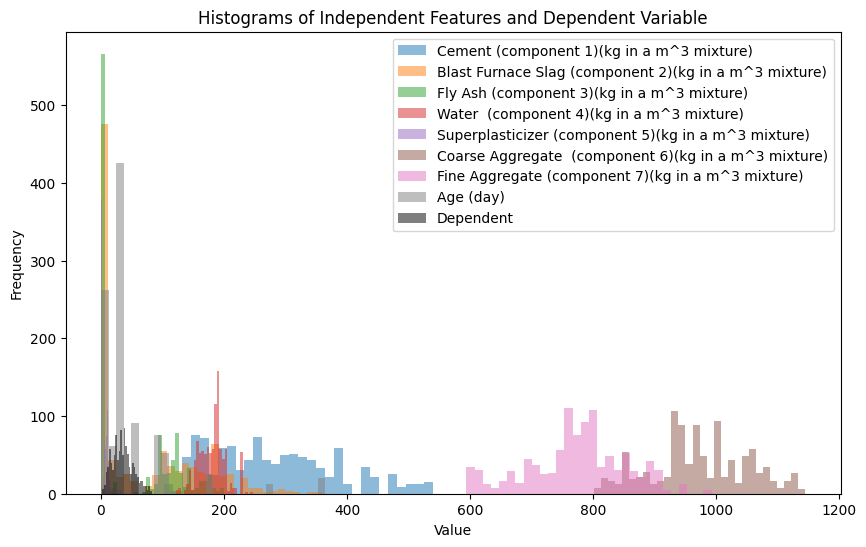

In [ ]:
# Plotting histograms for all Independent variables with Dependent variable in one chart
plt.figure(figsize=(10, 6))

for col in df.columns[:-1]:  # Skip the first column (Dependent) since it's the dependent variable
    plt.hist(df[col], bins=30, alpha=0.5, label=col)

# Adding Dependent variable
plt.hist(df[df.columns[-1]], bins=30, alpha=0.5, label='Dependent', color='black')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Independent Features and Dependent Variable')
plt.legend()
plt.show()

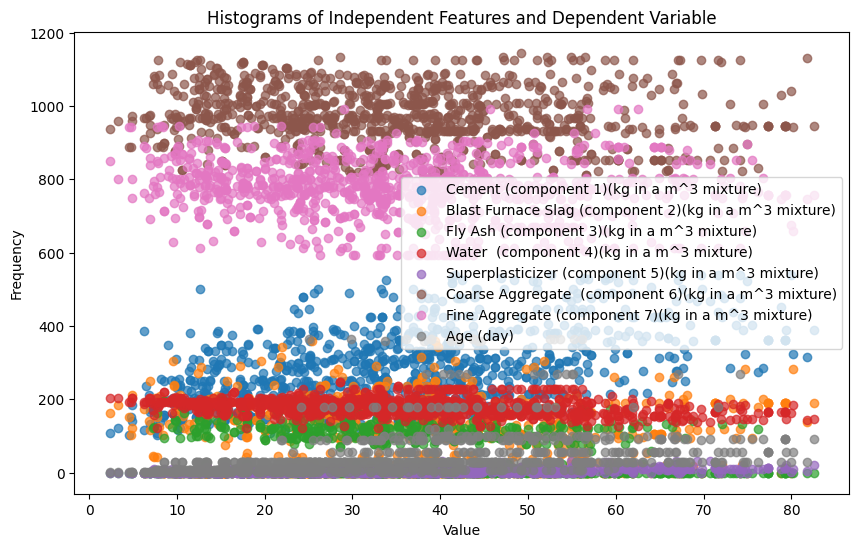

In [ ]:
# Plotting histograms for all Independent variables with Dependent variable in one chart
plt.figure(figsize=(10, 6))

for col in df.columns[:-1]:  # Skip the first column (Dependent) since it's the dependent variable
    plt.scatter(df[df.columns[-1]], df[col], label=col, alpha=0.7)

# Adding Dependent variable


plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Independent Features and Dependent Variable')
plt.legend()
plt.show()

In [ ]:
import pickle
pickle.dump(pipe2,open('pipe2.pkl','wb'))


In [ ]:
pipe1=Pipeline([
    ("Pipe1",clT),
    ("Pipe2",clT2),
    ("Pipe3",Models_with_Hype3['BaggingRegressor'])
])
pickle.dump(pipe1,open('pipe1.pkl','wb'))

In [ ]:
pipe2=Pipeline([
    ("Pipe1",clT),
    ("Pipe2",clT2),
    ("Pipe3",Models_with_Hype3['SVR'])
])
pickle.dump(pipe2,open('pipe2.pkl','wb'))

In [ ]:
pipe.fit(X_train,y_train)
pred_tr=pipe.predict(X_train)
pred_te=pipe.predict(X_test)

In [ ]:
r2_score(y_test,pred_te)
r2_score(y_test,pred_te)

0.8925986105603465

In [ ]:
df.sample()

Cement (component 1)(kg in a m^3 mixture)  \
620                                      254.0   

     Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
620                                                0.0       

     Fly Ash (component 3)(kg in a m^3 mixture)  \
620                                         0.0   

     Water  (component 4)(kg in a m^3 mixture)  \
620                                      198.0   

     Superplasticizer (component 5)(kg in a m^3 mixture)  \
620                                                0.0     

     Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
620                                              968.0      

     Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
620                                              863.0        365   

     Concrete compressive strength(MPa, megapascals)   
620                                         29.785363

In [ ]:
df.columns=[i[:i.find('(')] for i in df.columns]

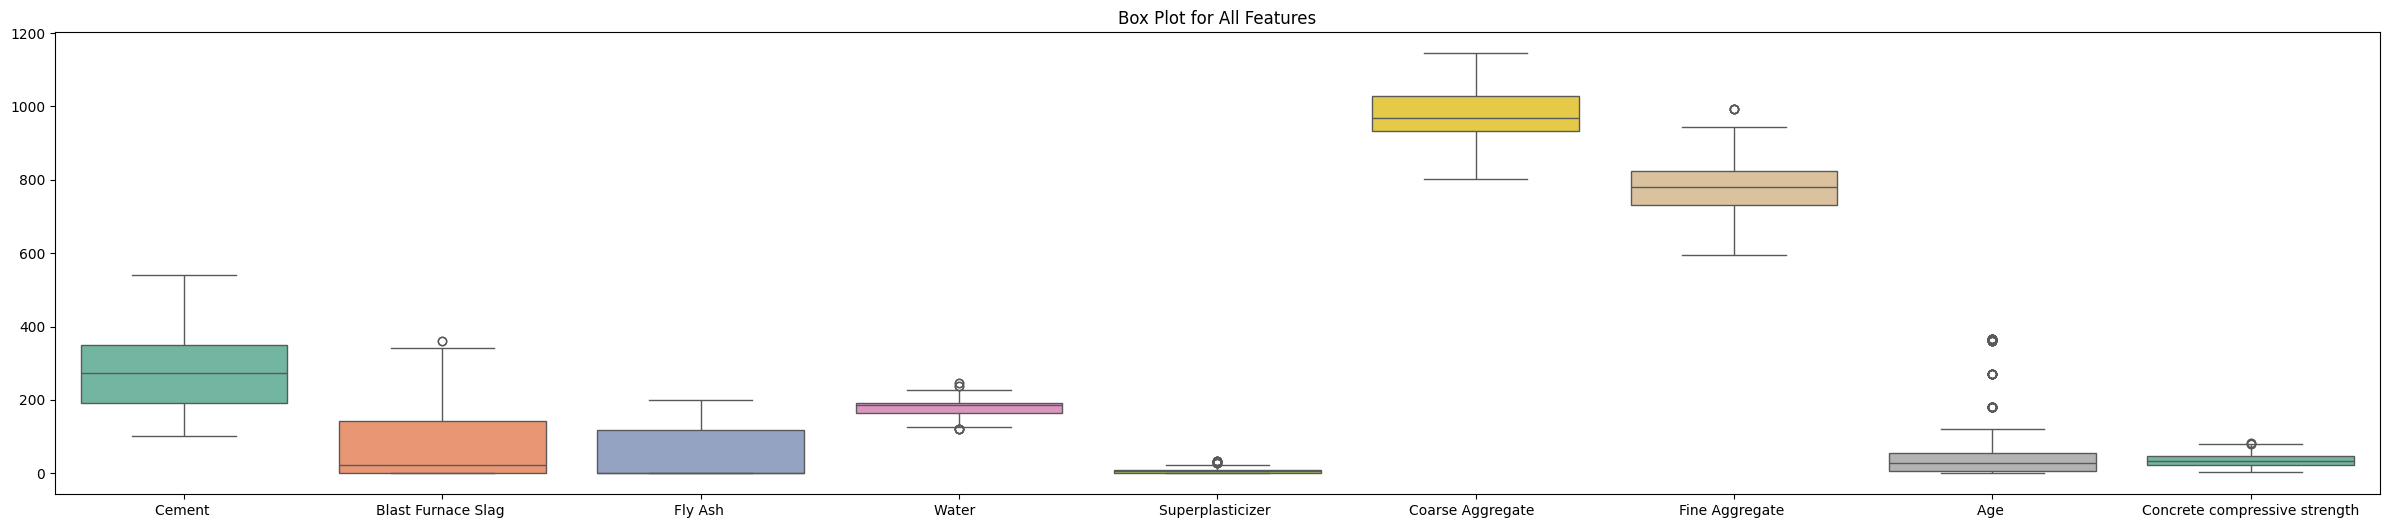

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame
import pandas as pd
import numpy as np

# Plotting box plots for all columns
plt.figure(figsize=(30, 6))
sns.boxplot(data=df, palette='Set2')
plt.title('Box Plot for All Features')
plt.show()


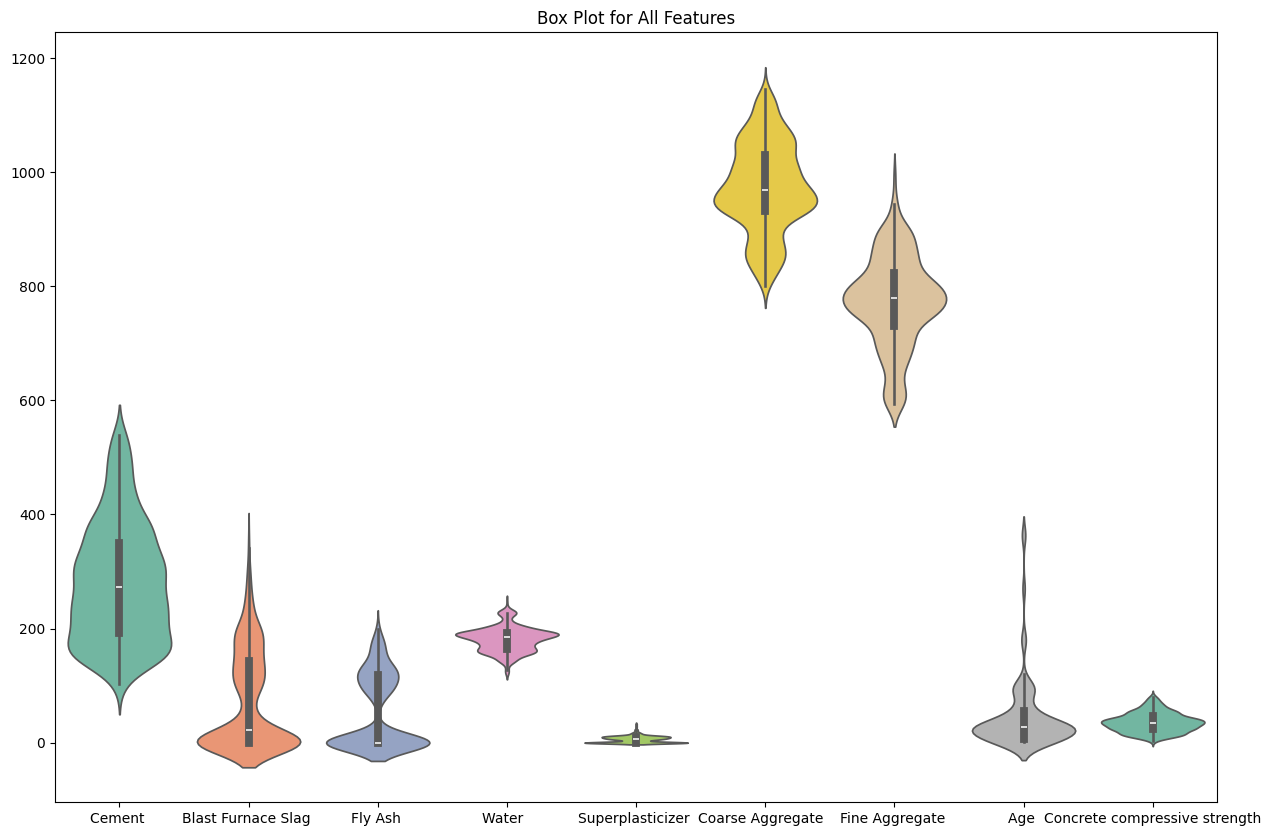

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plotting box plots for all columns
plt.figure(figsize=(15, 10))
sns.violinplot(data=df, palette='Set2')
plt.title('Box Plot for All Features')
plt.show()

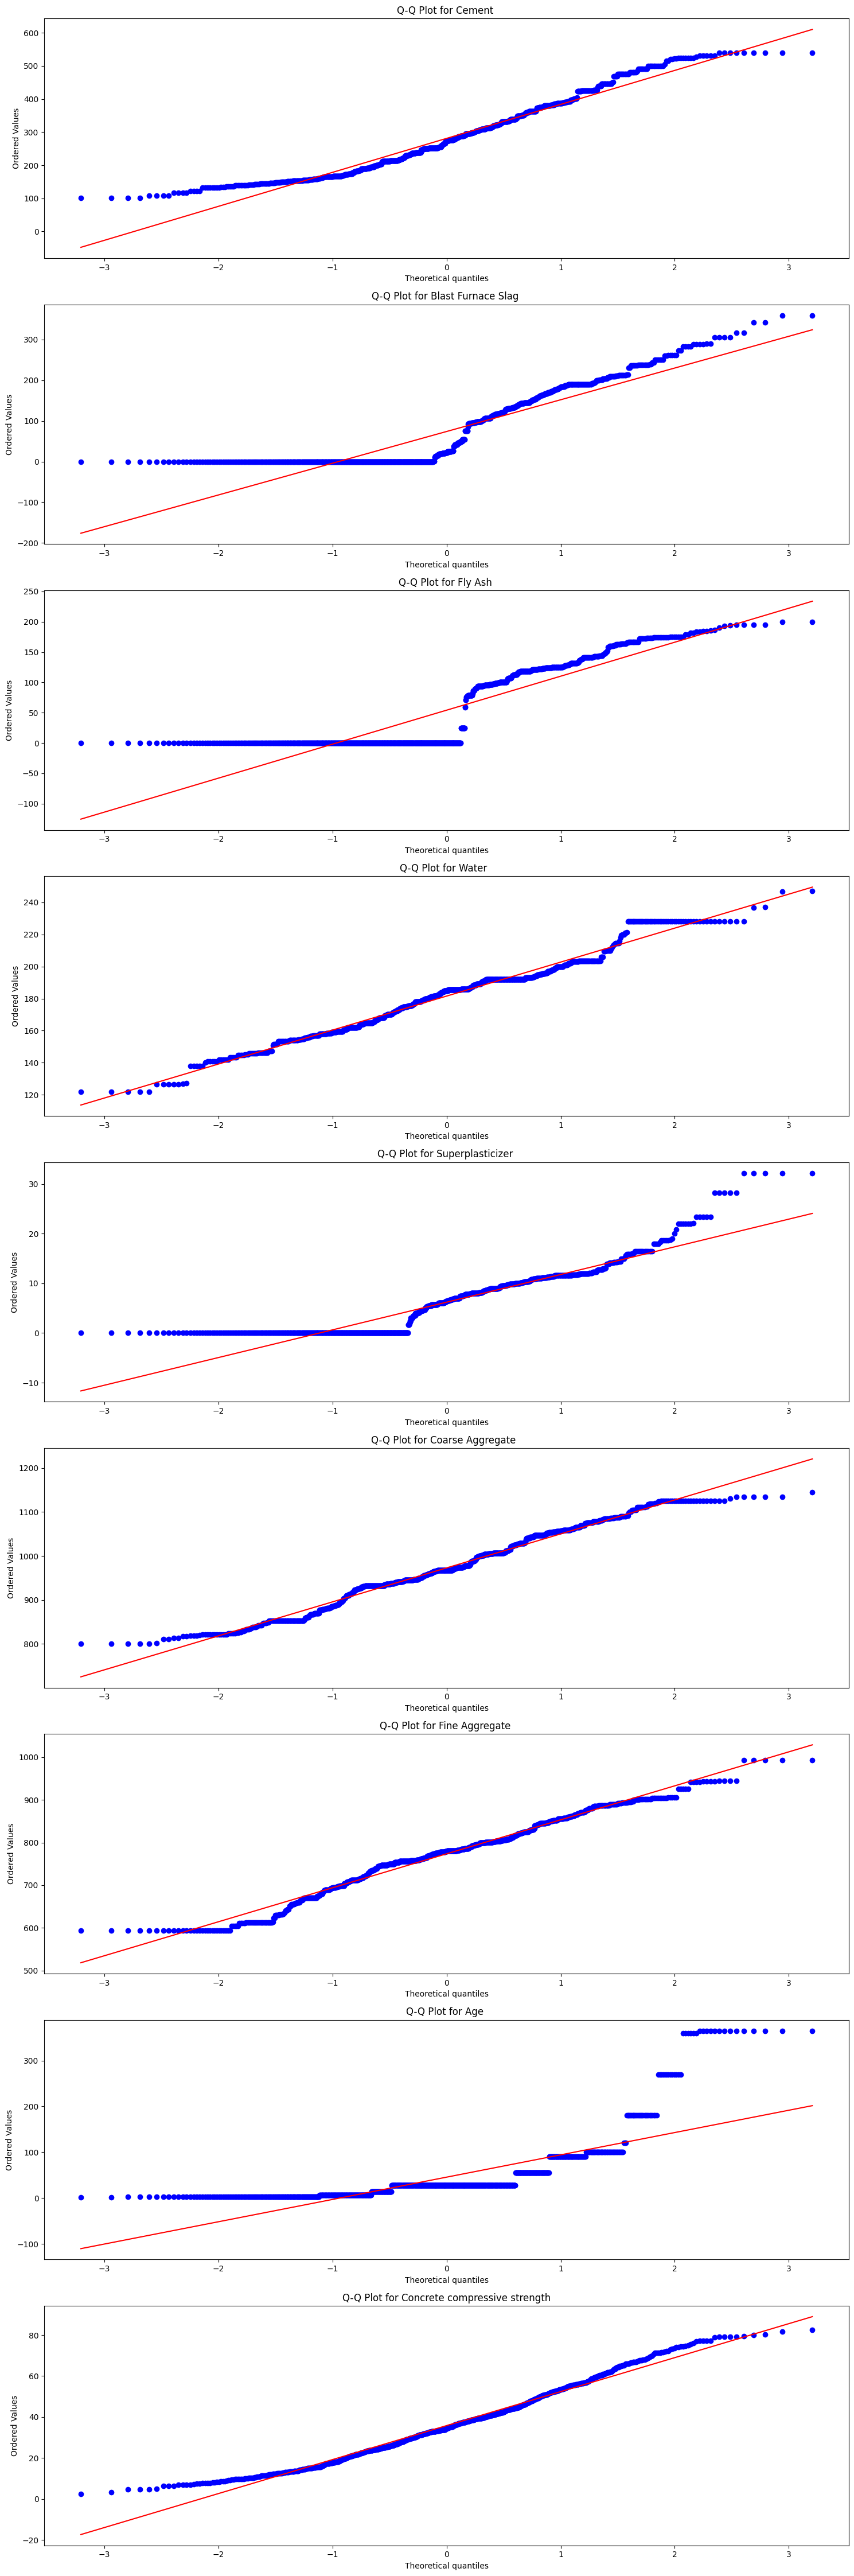

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats



# Create Q-Q plots for each column
plt.figure(figsize=(15, 5 * len(df.columns)))

for i, column in enumerate(df.columns):
    plt.subplot(len(df.columns), 1, i + 1)
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {column}')

plt.tight_layout()
plt.show()


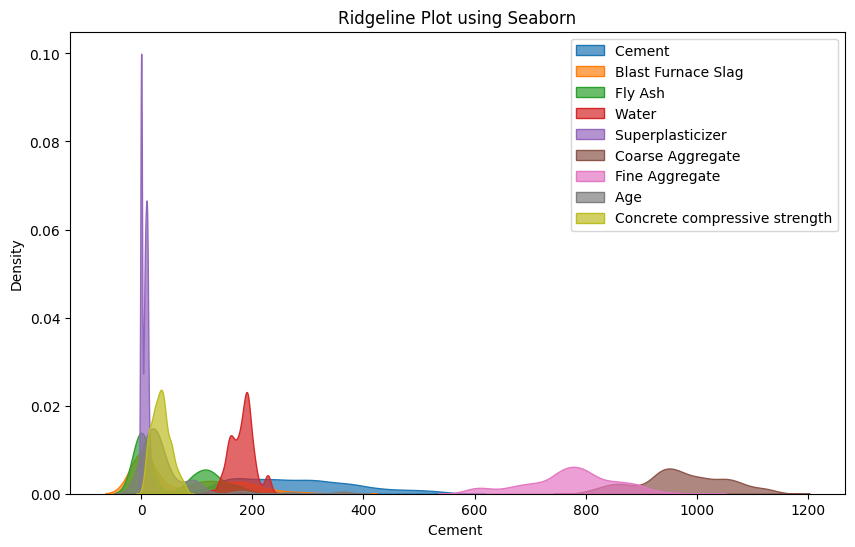

In [ ]:
# Set up the figure size
plt.figure(figsize=(10, 6))

# Loop through columns to create a ridgeline-like plot
for i, column in enumerate(df.columns):
    sns.kdeplot(df[column], fill=True, alpha=0.7, label=column)

plt.title('Ridgeline Plot using Seaborn')
plt.legend(loc='upper right')
plt.show()

In [ ]:
Models

{'LinearRegression': LinearRegression(),
 'Ridge': Ridge(),
 'Lasso': Lasso(),
 'ElasticNet': ElasticNet(),
 'SVR': SVR(),
 'RandomForestRegressor': RandomForestRegressor(),
 'ExtraTreesRegressor': ExtraTreesRegressor(),
 'BaggingRegressor': BaggingRegressor(estimator=SVR(), n_estimators=30),
 'StackingRegressor': StackingRegressor(estimators=[('LR', LinearRegression()), ('ls', Lasso()),
                               ('rd', Ridge()), ('svr', SVR()),
                               ('SGD', SGDRegressor())],
                   final_estimator=RandomForestRegressor()),
 'SGD': SGDRegressor()}